In [21]:
class env():
    def __init__(self,ls):
        self.seq = ls
        self.ac = -1
        self.len = len(self.seq)
        self.is_three = False
        self.nA = 3
    def walk(self,action=1):
        done =False
        try:
            prev_ac = self.ac
            self.ac += action
            reward = action*self.seq[self.ac]
            state = self.seq[self.ac]
            current_index = self.seq.index(state)
        except : 
            state = self.seq[prev_ac]
            self.ac = prev_ac
            reward = -20
            current_index = self.seq.index(state)
        
        if self.is_three and action == 3:
            state = self.seq[prev_ac]
            self.ac = prev_ac
            reward = -20
            current_index = self.seq.index(state)
            
        if action == 3:
            self.is_three =True
        if self.len-1== current_index:
            done =True
        yield state,reward,current_index,done
    def reset(self):
        self.seq = ls
        self.ac = -1
        self.is_three = False
        return 0

In [2]:
import numpy as np

In [3]:
def generating_episodes(env,Q,i):
    episode = []
    state = env.reset()
    is_three = False
    current_index = 0
    while True:
        action= get_action(Q[state],i)
        new_state,reward,current_index,done=list(hopping_stone.walk(action))[0] 
        episode.append((state,reward,current_index,action))
        state = new_state
        if done :
            break
    return episode
        

In [4]:
def get_action(Q,i):
    epsilon = 1.0/i    
    action_space = (np.zeros(3)+1)*epsilon/3
    action_space[np.argmax(Q)] = 1 - epsilon + epsilon/3
    action = np.random.choice(np.arange(3)+1,p=action_space)
    return action
        
        
    

In [29]:
np.arange(3)+1

array([1, 2, 3])

In [5]:
import sys
def mc_prediction_q(env, num_episodes, generate_episode, gamma=1.0):
    # initialize empty dictionaries of arrays
    returns_sum = defaultdict(lambda: np.zeros(3))
    N = defaultdict(lambda: np.zeros(3))
    Q = defaultdict(lambda: np.zeros(3))
    
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        ## TODO: complete the function
        temp_list = []
        episode= generating_episodes(env,Q,i_episode)
        for i,exp_tuple in enumerate(episode):
            ## state,reward,current_index,action
            state,_,_,action = exp_tuple
            N[state][action-1] += 1.0 
            for j,exp_tuple2 in enumerate(episode[i:]):
                _,reward,_,_ = exp_tuple2
                ## makes sure it's a single visit.
                if (state,action) not in temp_list:
                    returns_sum[state][action-1] += reward * (gamma ** j)
            Q[state][action-1] = returns_sum[state][action-1]/ N[state][action-1]
            temp_list.append((state,action))         
        
    return Q

In [11]:
from collections import defaultdict
#ls= [13,26,90,12,5,20]
ls = [5,4,3,3,1]
hopping_stone = env(ls)
Q= mc_prediction_q(hopping_stone, 20000, generating_episodes)

Episode 20000/20000.

In [12]:
Q

defaultdict(<function __main__.mc_prediction_q.<locals>.<lambda>()>,
            {0: array([ 2.85714286, 14.93916958,  5.66666667]),
             3: array([  1.9974396 ,  -6.23076923, -17.85714286]),
             5: array([  9.4, -12. , -50. ]),
             4: array([6.99229482, 0.        , 3.        ])})

In [14]:
#ls= [13,26,90,12,5,20]
ls = [5,4,3,2,1]
hopping_stone = env(ls)
action = np.argmax(Q[0])+1
r = 0
while True:
    new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
    r += reward
    action = np.argmax(Q[new_state])+1
    if done :
        break
print(r)

14


In [162]:
90*3 + 12*1 +  20*2

322

In [200]:
index = [(i,(np.argmax(Q[i])+1)) for i in ls]
print(index)
ls=[0]+ [13,26,90,12,5,20]

[(13, 1), (26, 1), (90, 1), (12, 2), (5, 1), (20, 1)]


In [201]:
index = [(np.argmax(Q[i])+1) for i in ls]
ins = np.argmax(Q[0])+1
k = ins
r = []
t = 0 
while True:
    if t != 0:
        ins += k
    r.append(k*ls[ins])
    k = np.argmax(Q[ls[ins]])+1
    t =1
    if ins == len(ls)-1:
        break
    
print(sum(r))    

322


In [216]:
Q

defaultdict(<function __main__.mc_prediction_q.<locals>.<lambda>()>,
            {0: array([  0.        , 176.04433498, 321.99870738]),
             26: array([141.87341772,  61.44444444,   0.        ]),
             12: array([22.5, 40. , 20. ]),
             5: array([20.,  0.,  0.]),
             90: array([51.9991496, 30.       , 32.       ]),
             13: array([0., 0., 0.]),
             20: array([0., 0., 0.])})

In [245]:
ls= [13,26,90,12,5,20]
hopping_stone = env(ls)
action = np.argmax(Q[0])+1
r = 0
while True:
    new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
    r += reward
    action = np.argmax(Q[new_state])+1
    if done :
        break
print(r)

322


In [68]:
from collections import defaultdict
Q = defaultdict(lambda:np.zero(5))
for i in range(5):
    print(generating_episodes(hopping_stone,Q))

[(0, 57, 2, 3), (19, 12, 3, 1), (12, 5, 4, 1), (5, 20, 5, 1)]
[(0, 57, 2, 3), (19, 12, 3, 1), (12, 5, 4, 1), (5, 20, 5, 1)]
[(0, 13, 0, 1), (13, 26, 1, 1), (26, 15, 4, 3), (5, -20, 4, 3), (5, -20, 4, 2), (5, 20, 5, 1)]
[(0, 52, 1, 2), (26, 15, 4, 3), (5, -20, 4, 3), (5, 20, 5, 1)]
[(0, 52, 1, 2), (26, 15, 4, 3), (5, -20, 4, 3), (5, 20, 5, 1)]


In [16]:

temp = {}
matrix = np.array([[1,2,3],[2,3,4],[3,4,1]])
print(matrix)
flag=0
nrow ,ncol = matrix.shape
for i in range(nrow):
    for j in range(ncol):
        #print(matrix[i][j])
        if i+j != ncol and i+j != 0:
            if i+j not in temp.keys():
                temp[i+j] = [matrix[i][j]]
            else :
                if temp[i+j][-1] != matrix[i][j]:
                    print("\nNot the required matrix!!")
                    flag = 1
                    break
if flag == 0: print("Hankle matrix") 

[[1 2 3]
 [2 3 4]
 [3 4 1]]
Hankle matrix


In [71]:
np.array(matrix)

array([[1, 2, 3],
       [2, 3, 5]])

In [68]:
temp

{1: [2, 2], 2: [3, 3]}

In [100]:
26*2 + 19 +20*3

131

In [210]:
np.array([[1,2,3],[2,3,4],[3,4,1]])

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 1]])

In [30]:
import matplotlib.pyplot as plt

## Sarsamax

In [106]:
# def generate_episodes(env,Q,i):
#     state = env.reset()
#     action = get_action(env,Q,state,i)
#     episode = []
#     ##for ii in range(700):
#     while True:
#         next_state,reward,done,prob=env.walk(action)
#         next_action = get_action(env,Q,next_state,i)
#         episode.append((state,action,next_state,next_action,reward))
#         state = next_state
#         action = next_action
#         if done:
#             break
#     return episode


def generating_episodes(env,Q,i):
    episode = []
    state = env.reset()
    is_three = False
    current_index = 0
    action= get_action(Q[state],i)
    while True:
        new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
        next_action= get_action(Q[new_state],i)
        #episode.append((state,reward,current_index,action,new_state,next_action))
        episode.append((state,action,new_state,next_action,reward))
        state = new_state
        action = next_action
        if done :
            break
    return episode

# def get_action(env,Q,state,i):
# #     nA = 3
# #     epsilon = 1.0/i
# #     probs = epsilon*(np.ones(nA))/nA
# #     probs[np.argmax(Q[state])]+= 1-epsilon
# #     return np.random.choice(np.arange(nA),p=probs)

def get_action(Q,i):
    epsilon = 1.0/i  
    if i < 1500:
        epsilon = 0.8
    #epsilon = 1.0/i    
    action_space = (np.zeros(3)+1)*epsilon/3
    action_space[np.argmax(Q)] = 1 - epsilon + epsilon/3
    action = np.random.choice(np.arange(3)+1,p=action_space)
    return action



def q_learning(env, num_episodes, alpha, gamma=1.0):
    # initialize action-value function (empty dictionary of arrays)
    Q = defaultdict(lambda: np.zeros(env.nA))
    # initialize performance monitor
    # loop over episodes
    tmp = []
    for i_episode in range(1, num_episodes+1):


        if i_episode == 1:
            scores =[]
        # monitor progress
        if i_episode % 100 == 0:
            if scores:
                tmp.append(np.mean(scores))
                #print(tmp)
            scores = []
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            #print(episode)
            sys.stdout.flush()   

        ## TODO: complete the function
        episode = generating_episodes(env,Q,i_episode)
        counter = 0
        #print(episode)
        for j,(state,action,next_state,next_action,reward) in enumerate(episode):
            #print(action,next_action)
            counter += reward
            Q[state][action-1] +=  alpha * (reward + (gamma**j) * Q[next_state][np.argmax(Q[next_state])] - Q[state][action-1])
        scores.append(counter)    
    # plot performance
    plt.plot(np.linspace(0,num_episodes,len(tmp),endpoint=False),np.asarray(tmp))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over Next %d Episodes)' % 100)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % 100), np.max(tmp))

    return Q


Episode 20000/20000

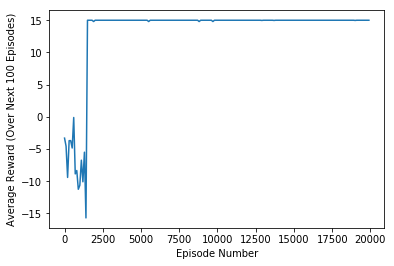

Best Average Reward over 100 Episodes:  15.0


In [107]:
#ls= [13,26,90,12,5,20]
ls = [5,4,3,2,1]
hopping_stone = env(ls)
Q = q_learning(hopping_stone,20000,0.04)
# state,action,next_state,next_action,reward

In [97]:
Q

defaultdict(<function __main__.q_learning.<locals>.<lambda>()>,
            {0: array([ 0.27501112,  0.3836036 , 19.        ]),
             3: array([ 0.81909393, 10.        , -1.5065344 ]),
             4: array([ 1.08621105, -0.8       , -0.8       ]),
             5: array([0., 0., 0.]),
             1: array([0.71848603, 0.        , 0.        ]),
             2: array([2.89100537, 0.35013069, 0.        ])})

In [105]:
#ls= [13,26,90,12,5,20]
ls = [5,4,3,2,1]
hopping_stone = env(ls)
action = np.argmax(Q[0])+1
r = 0
while True:
    new_state,reward,current_index,done=list(hopping_stone.walk(action))[0]
    r += reward
    action = np.argmax(Q[new_state])+1
    if done :
        break
print(r)

15


In [1]:
from collections import Counter


In [3]:
ls = [1,1,2,2]
dic = Counter(ls)
dic

Counter({1: 2, 2: 2})

In [4]:
dic.update([1,1])

In [5]:
dic

Counter({1: 4, 2: 2})

In [7]:
dic[1]-=1

In [10]:
dic.update([3])

In [11]:
dic

Counter({1: 3, 2: 2, 3: 1})

In [13]:
del dic[1]

In [14]:
dic

Counter({2: 2, 3: 1})

In [85]:
def quick_sort(array):
    n = len(array)
    pivot = len(array)//2
    #pivot = -3
    print(array[pivot])
    init = 0
    terminal= 0
    while True:
        print("init",init)
        print("terminal",terminal)
        while True:
            if (n-abs(terminal))==init+1:
                print("init",init)
                print("terminal",terminal)
                return array[:init+1],array[init+1:]
            if array[init]>array[pivot]:
                #init +=1
                break
            init += 1
        while True:
            terminal -= 1
            if array[terminal]<array[pivot]:
                array[init],array[terminal] = array[terminal],array[init]
                #terminal-=1
                init += 1
                break
            
            if (n-abs(terminal))==init+1:
                print("init",init)
                print("terminal",terminal)
                return array[:init+1],array[init+1:]
        
        if (n-abs(terminal))==init+1:
            print("init",init)
            print("terminal",terminal)
            if array[terminal]
            return array[:init+1],array[init+1:]
        

In [54]:
 0  1  2  3
-4 -3 -2 -1

SyntaxError: invalid syntax (<ipython-input-54-747972c1e962>, line 1)

In [86]:
#ls = [1,0,6,4,5,2,9,5,3]
ls = [15,3,9,8,5,2,7,1,6]
v,j=quick_sort(ls)
print(v,j)

5
init 0
terminal 0
init 1
terminal -2
init 3
terminal -4
init 3
terminal -5
[1, 3, 2, 8] [5, 9, 7, 15, 6]


In [49]:
ls =[2,2,2,3,3,3,2,3,3,2,3,4,2,1,2,2,2,2,1,2,2,3,3,1,2]
from statistics import *
median(ls)
from collections import Counter

In [42]:
%%timeit
sorted(ls)


1.47 µs ± 26.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [60]:
%%timeit
min_ = min(ls)
max_ = max(ls)
sort = [0]*len(ls)
index = {i:0 for i in range(min_,max_+1)}
for j in ls:
    index[j]+=1
#index = Counter(ls)
counter = 0 
for key,out in index.items():
    index[key] = out+counter
    counter += out
for ii in ls:
    sort[index[ii]-1]=ii
    index[ii] -= 1
#index
sort

9.98 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [57]:
def counting_sort(ls):
    min_ = min(ls)
    max_ = max(ls)
    index = {i:0 for i in range(min_,max_+1)}

In [1]:
from collections import deque
ls = deque()


# Greedy Algorithm



In [1]:
def minRefills(x,n,L):
    """
    x: array contains data about stations and is described as km from 
    origin.
    n: the index of pump before distination.
    L: number of kilometer it can travel after refill.
    """
    currentrefill = 0
    numrefill = 0
    while currentrefill <= n:
        lastrefill = currentrefill
        while currentrefill <= n and x[currentrefill+1]-x[lastrefill]<=L:
            currentrefill+=1
        if currentrefill==lastrefill:
            print("Impossible")
        if currentrefill<=n:
            numrefill+=1
    return numrefill

## Main Ingredients of Greedy algorithm
* Reduction to Subproblem
    * Make a first move
    * Then solve a problem of the same kind
* Safe move
    * A move is called safe move if there is an optimal solution consistent with this first move.
    
    
### General Strategy 
* Make a greedy choice 
* Prove that is a safe move.
* Reduce to a subproblem
* solve the subproblem

### Grouping Children
* Safe move: cover the leftmost point with a unit segment with left end in this point.


In [27]:
def groupingSorted(arr,allowed_diff):
    ls = []
    f=[]
    counter =0
    index = 0
    l = len(arr)
    while index<l:
        arr_ = arr[index:]
        min_ = arr_[0]
        #print(min_,"asa")
        for ii in arr_:
            if ii-min_<= allowed_diff:
                ls.append(ii)
                index+=1
            else:
                counter += 1
                break
        f.append(ls)
        ls = []
    return counter,f

## Course algo
def PointsCoverSorted(arr):
    R = [];i=1
    while i<=n:
        [l,r] = [arr[i],arr[i]+1]
        R.append([l,r])
        i+=1
        while i<=n and arr[i]<=r:
            i+=1
    return R

x = [5,5.5,5.8,6,7,9,12]
diff = 1.0
groupingSorted(x,diff)

(3, [[5, 5.5, 5.8, 6], [7], [9], [12]])

## Long Hike 

In [44]:
20 -> 4kg  real 5.0
18 -> 3kg   real 6.0
14 -> 2kg   real 7.0
cap 7kg

[4, 4, 5]

In [45]:
2*7+ 6*3 + 5*2

cap 2+3+2

5.0

In [46]:
2*7+ 6*3 + 5*2

42

### Safe move
#### Lemma
There exists an optimal solution that uses as much as possible of an item with the maximal value per unit of weight.

#### Greedy Algorithm
* While knapsack is not full
* Choose item *i* with maximum $\frac{v_i}{w_i}$
* If item fits into knapsack, take all of ot
* Otherwise take so much as to fill the knapsack
* Return total value and amounts taken

### PseudoCode
```
Knapsack(W,w1,v1,...,w_n,v_n):
    repeat n times:
        if W=0:
            return (V,A)
        select i with w_i > 0 and max v_i/w_i:
            a <- min(w_i,W)
            V <- V + a v_i/w_i
            w_i <- w_i-a, A[i]<- A[i]+a,W<-W-a
    return (V,A)
```


In [61]:
import math
def optimal_points(segments,lens):
    value = 0
    prev = -1
    ls =[]
    to = math.inf
    segments = sorted(segments)
    #print(segments)
    counter = 0
    temp =0 
    while temp<lens+1:
        print(temp)
        print(to,"to")
        value += 1
        counter = 0
        for segment in segments:
            start,stop=segment
            if value>= start and value<= stop:
                counter += 1
                temp +=1
                to = min(to,stop)
#         print(segment,ls)
        if value>to:
            #print(prev,counter)
            segments = segments[counter:]
            #print(len(segments),segments)
            ls.append(value-1)
            value -=1
            prev = -2
            to = math.inf
            #if len(segments)==1:
    return ls
    
ls =[[4,7],[1,3],[2,5],[5,6]]
print(optimal_points(ls,lens=4))
ls = [[1,3],[2,5],[3,6]]
print(optimal_points(ls,lens=3))

0
inf to
1
3 to
3
3 to
[]
0
inf to
1
3 to
3
3 to
[]


In [46]:
ls = [[1,2],[2,1],[3,3],[4,5]]


In [91]:
len(ls[4:])

ls.sort(key = lambda x:x[1])
ls

[[2, 1], [1, 2], [3, 3], [4, 5]]

In [92]:
43
1 4 5 8 9 10 14 15 18 23 26 28 29 30 32 34 35 36 40 41 44 46 49 52 54 56 58 61 62 63 65 67 70 74 77 78 79 82 84 87 91 93 95

Correct output:
43
1 4 5 8 9 10 14 15 18 23 26 28 29 30 32 34 35 36 40 41 44 46 49 52 54 56 58 61 62 63 65 67 70 74 77 78 79 81 84 87 91 93 95 
 (Time used: 0.04/5.00, memory used: 9760768/536870912.)

1 4 5 8 9 10 14 15 18 23 26 28 29 30 32 34 35 36 40 41 44 46 49 52 54 56 58 61 62 63 65 67 70 74 77 78 79 81 84 87 91 93 95
1 4 5 8 9 10 14 15 18 23 26 28 29 30 32 34 35 36 40 41 44 46 49 52 54 56 58 61 62 63 65 67 70 74 77 78 79 81 84 87 91 93 95

1 4 5 8 9 10 14 15 18 23 26 28 29 30 32 34 35 36 40 41 44 46 49 52 54 56 58 61 62 63 65 67 70 74 77 78 79 81 84 87 91 93 95


SyntaxError: invalid syntax (<ipython-input-92-79b0b17b6b74>, line 2)

In [93]:
import math
ls =[[4,7],[1,3],[2,5],[5,6]]
sorted(ls)

[[1, 3], [2, 5], [4, 7], [5, 6]]

In [168]:
import math
def optimal_points(segments):
    value = 0
    sorted_seg = sorted(segments)
    to  = math.inf
    s1 = []
    ls = []
    temp = []
    while True:
        value+=1
        s1 =[]
        for ss in sorted_seg:
            start = ss[0];stop=ss[1]
            if value < start:
                break
            if value >= start and value <= stop:
                to = min(stop,to)
                s1.append(ss)
        
        #print(s1,temp,value,to,ls)
        #print(ls,"value:",value,"to:",to,"ls:",ls,"s1:",s1)
        if value > to :
            #print(s1)
            dummy = [sorted_seg.remove(ii) for ii in temp]
            value -= 1
            s1 =[]
            ls.append(value)
            to = math.inf
            if len(sorted_seg)==0:
                return ls
        temp = list(s1)
ls =[[4,7],[1,3],[2,5],[5,6]]
print(optimal_points(ls))
ls = [[1,3],[2,5],[3,6]]
print(optimal_points(ls))
ls= [[41, 42], [52, 52], [63, 63], [80, 82], [78, 79], [35, 35], [22, 23], [31, 32], [44, 45], [81, 82], [36, 38], [10, 12], [1, 1], [23, 23], [32, 33], [87, 88], [55, 56], [69, 71], [89, 91], [93, 93], [38, 40], [33, 34], [14, 16], [57, 59], [70, 72], [36, 36], [29, 29], [73, 74], [66, 68], [36, 38], [1, 3], [49, 50], [68, 70], [26, 28], [30, 30], [1, 2], [64, 65], [57, 58], [58, 58], [51, 53], [41, 41], [17, 18], [45, 46], [4, 4], [0, 1], [65, 67], [92, 93], [84, 85], [75, 77], [39, 41], [15, 15], [29, 31], [83, 84], [12, 14], [91, 93], [83, 84], [81, 81], [3, 4], [66, 67], [8, 8], [17, 19], [86, 87], [44, 44], [34, 34], [74, 74], [94, 95], [79, 81], [29, 29], [60, 61], [58, 59], [62, 62], [54, 56], [58, 58], [79, 79], [89, 91], [40, 42], [2, 4], [12, 14], [5, 5], [28, 28], [35, 36], [7, 8], [82, 84], [49, 51], [2, 4], [57, 59], [25, 27], [52, 53], [48, 49], [9, 9], [10, 10], [78, 78], [26, 26], [83, 84], [22, 24], [86, 87], [52, 54], [49, 51], [63, 64], [54, 54]]
%timeit print(optimal_points(ls))

[3, 6]
[3]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 8

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

In [102]:
from collections import Counter
s1 = Counter()


In [114]:
s1.update([2])
s1

Counter({1: 9, 2: 1})

In [116]:
from collections import Counter

In [14]:
import math
def optimal_points(segments,lens):
    sorted_seg = sorted(segments)
    value = sorted_seg[0][0]-1
    to  = math.inf
    #lo = -1
    #s1 = []
    ls = []
    #temp = []
    counter = 0
    while True:
        value+=1
        #s1 =[]
        counter = 0
        for ss in sorted_seg:
            start = ss[0];stop=ss[1]
            if start>value or to<start:
                break
            if value >= start and value <= stop:
                to = min(stop,to)
                #s1.append(ss)
                counter +=1
        #print(ls)
        
        #print(value,counter,ls,lens)
        #print(ls,"value:",value,"to:",to,"ls:",ls,"s1:",s1)
        if value > to:
            #print(s1)
            #dummy = [sorted_seg.remove(ii) for ii in temp]
            to = math.inf
            sorted_seg = sorted_seg[prev_counter:]
            #return sorted_seg,value,counter,prev
            lens-=prev_counter
            value -= 1
            #s1 =[]
            ls.append(value)
            #print(sorted_seg,"ssd")
            
            #print(sorted_seg,value,counter,ls,lens)
            if lens<=0:
                return ls
        #temp = list(s1)
        prev_counter = counter
ls =[[4,7],[1,3],[2,5],[5,6]]
print(optimal_points(ls, 4))
ls = [[1,3],[2,5],[3,6]]
print(optimal_points(ls,3))
ls= [[41, 42], [52, 52], [63, 63], [80, 82], [78, 79], [35, 35], [22, 23], [31, 32], [44, 45], [81, 82], [36, 38], [10, 12], [1, 1], [23, 23], [32, 33], [87, 88], [55, 56], [69, 71], [89, 91], [93, 93], [38, 40], [33, 34], [14, 16], [57, 59], [70, 72], [36, 36], [29, 29], [73, 74], [66, 68], [36, 38], [1, 3], [49, 50], [68, 70], [26, 28], [30, 30], [1, 2], [64, 65], [57, 58], [58, 58], [51, 53], [41, 41], [17, 18], [45, 46], [4, 4], [0, 1], [65, 67], [92, 93], [84, 85], [75, 77], [39, 41], [15, 15], [29, 31], [83, 84], [12, 14], [91, 93], [83, 84], [81, 81], [3, 4], [66, 67], [8, 8], [17, 19], [86, 87], [44, 44], [34, 34], [74, 74], [94, 95], [79, 81], [29, 29], [60, 61], [58, 59], [62, 62], [54, 56], [58, 58], [79, 79], [89, 91], [40, 42], [2, 4], [12, 14], [5, 5], [28, 28], [35, 36], [7, 8], [82, 84], [49, 51], [2, 4], [57, 59], [25, 27], [52, 53], [48, 49], [9, 9], [10, 10], [78, 78], [26, 26], [83, 84], [22, 24], [86, 87], [52, 54], [49, 51], [63, 64], [54, 54]]
%timeit print(optimal_points(ls,100))

[3, 6]
[3]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 8

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

In [1]:
import math
from collections import Counter
def optimal_points(segments):
    value = 0
    #sorted_seg = sorted(segments)
    sorted_seg = list(segments)
    to  = math.inf
    s1 = []
    ls = []
    temp = []
    while True:
        value+=1
        s1 =[]
        for ss in sorted_seg:
            start = ss[0];stop=ss[1]
            if value >= start and value <= stop:
                to = min(stop,to)
                s1.append(ss)
        
        #print(s1,temp,value,to,ls)
        #print(ls,"value:",value,"to:",to,"ls:",ls,"s1:",s1)
        if value > to :
            #print(s1)
            dummy = [sorted_seg.remove(ii) for ii in temp]
            value -= 1
            s1 =[]
            ls.append(value)
            to = math.inf
            if len(sorted_seg)==0:
                return ls
        #print(ls)
        temp = list(s1)
ls =[[4,7],[1,3],[2,5],[5,6]]
print(optimal_points(ls))
ls = [[1,3],[2,5],[3,6]]
print(optimal_points(ls))
ls= [[41, 42], [52, 52], [63, 63], [80, 82], [78, 79], [35, 35], [22, 23], [31, 32], [44, 45], [81, 82], [36, 38], [10, 12], [1, 1], [23, 23], [32, 33], [87, 88], [55, 56], [69, 71], [89, 91], [93, 93], [38, 40], [33, 34], [14, 16], [57, 59], [70, 72], [36, 36], [29, 29], [73, 74], [66, 68], [36, 38], [1, 3], [49, 50], [68, 70], [26, 28], [30, 30], [1, 2], [64, 65], [57, 58], [58, 58], [51, 53], [41, 41], [17, 18], [45, 46], [4, 4], [0, 1], [65, 67], [92, 93], [84, 85], [75, 77], [39, 41], [15, 15], [29, 31], [83, 84], [12, 14], [91, 93], [83, 84], [81, 81], [3, 4], [66, 67], [8, 8], [17, 19], [86, 87], [44, 44], [34, 34], [74, 74], [94, 95], [79, 81], [29, 29], [60, 61], [58, 59], [62, 62], [54, 56], [58, 58], [79, 79], [89, 91], [40, 42], [2, 4], [12, 14], [5, 5], [28, 28], [35, 36], [7, 8], [82, 84], [49, 51], [2, 4], [57, 59], [25, 27], [52, 53], [48, 49], [9, 9], [10, 10], [78, 78], [26, 26], [83, 84], [22, 24], [86, 87], [52, 54], [49, 51], [63, 64], [54, 54]]

%timeit print(optimal_points(ls))

[3, 6]
[3]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 8

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

In [158]:
ls = [1,2,3,4]


In [159]:
ls[2]

3

In [ ]:
from collections import namedtuple

Segment = namedtuple('Segment', 'start end')

# def optimal_points(segments,lens):
#     value = 0
#     prev = -1
#     ls =[]
#     temp = []
#     segments.sort()
#     print(segments)
#     while True:
#         value += 1
#         counter = 0
#         for segment in segments:
#             start,stop=segment
#             if value>= start and value<= stop:
#                 counter += 1
#                 temp.append(stop)
#         #print(prev,counter,value)
#         if prev>counter or value > min(temp):
#             #print(prev,counter)
#             segments = segments[prev:]
#             ls.append(value-1)
#             value -=1
#             prev = -2
#             temp = []
#             if len(segments)==0:
#                 return ls
#         else:
#             prev = counter


import math
# import math
# def optimal_points(segments,lens):
#     value = 0
#     sorted_seg = sorted(segments)
#     to  = math.inf
#     sl = []
#     ls = []
#     while True:
#         value+=1
#         for ss in sorted_seg:
#             start = ss[0];stop=ss[1]
#             if value >= start and value <= stop:
#                 to = min(stop,to)
#                 sorted_seg.remove(ss)
#         print(ls)
#         if value > to:
#             #dummy = [sorted_seg.remove(ii) for ii in sl]
#             value -= 1
#             ls.append(value)
#             to = math.inf
#             if len(sorted_seg)==0:
#                 return ls
# def optimal_points(segments,lens):
#     value = 0
#     sorted_seg = sorted(segments)
#     to  = math.inf
#     s1 = []
#     ls = []
#     temp = []
#     while True:
#         value+=1
#         s1 =[]
#         for ss in sorted_seg:
#             start = ss[0];stop=ss[1]
#             if value >= start and value <= stop:
#                 to = min(stop,to)
#                 s1.append(ss)
        
#         #print(s1,temp,value,to,ls)
#         #print(ls,"value:",value,"to:",to,"ls:",ls,"s1:",s1)
#         if value > to :
#             #print(s1)
#             #dummy = [sorted_seg.remove(ii) for ii in temp]
#             for ii in temp:
#                 sorted_seg.remove(ii)
#                 lens-=1
#             value -= 1
#             s1 =[]
#             ls.append(value)
#             to = math.inf
#             if lens==0:
#                 return ls
#         temp = list(s1)

In [17]:
import math
def optimal_points(segments,lens):
    sorted_seg = sorted(segments)
    value = sorted_seg[0][0]-1
    to  = math.inf
    #s1 = []
    ls = []
    #temp = []
    counter = 0
    while True:
        value+=1
        #s1 =[]
        counter = 0
        tem= -1
        for ss in sorted_seg:
            value+=1
            start = ss[0];stop=ss[1]
#             if start>value:
#                 break
            if value >= start and value <= stop:
                to = min(stop,to)
                #s1.append(ss)
                counter +=1
            if value>to:
                break
            prev_counter =  counter
        
        print(sorted_seg,value,counter,ls,lens)
        #print(ls,"value:",value,"to:",to,"ls:",ls,"s1:",s1)
        if value > to :
            #print(s1)
            #dummy = [sorted_seg.remove(ii) for ii in temp]
            temp = sorted_seg[prev_counter]
            
            sorted_seg = sorted_seg[prev_counter:]
            #return sorted_seg,value,counter,prev
            lens-=prev_counter
            value -= 1
            #s1 =[]
            ls.append(value)
            #value = temp[1]
            to = math.inf
            #print(sorted_seg,value,counter,ls,lens)
            if lens<=0:
                return ls
        #temp = list(s1)
        prev_counter = counter
ls =[[4,7],[1,3],[2,5],[5,6]]
print(optimal_points(ls, 4))
ls = [[1,3],[2,5],[3,6]]
print(optimal_points(ls,3))
ls= [[41, 42], [52, 52], [63, 63], [80, 82], [78, 79], [35, 35], [22, 23], [31, 32], [44, 45], [81, 82], [36, 38], [10, 12], [1, 1], [23, 23], [32, 33], [87, 88], [55, 56], [69, 71], [89, 91], [93, 93], [38, 40], [33, 34], [14, 16], [57, 59], [70, 72], [36, 36], [29, 29], [73, 74], [66, 68], [36, 38], [1, 3], [49, 50], [68, 70], [26, 28], [30, 30], [1, 2], [64, 65], [57, 58], [58, 58], [51, 53], [41, 41], [17, 18], [45, 46], [4, 4], [0, 1], [65, 67], [92, 93], [84, 85], [75, 77], [39, 41], [15, 15], [29, 31], [83, 84], [12, 14], [91, 93], [83, 84], [81, 81], [3, 4], [66, 67], [8, 8], [17, 19], [86, 87], [44, 44], [34, 34], [74, 74], [94, 95], [79, 81], [29, 29], [60, 61], [58, 59], [62, 62], [54, 56], [58, 58], [79, 79], [89, 91], [40, 42], [2, 4], [12, 14], [5, 5], [28, 28], [35, 36], [7, 8], [82, 84], [49, 51], [2, 4], [57, 59], [25, 27], [52, 53], [48, 49], [9, 9], [10, 10], [78, 78], [26, 26], [83, 84], [22, 24], [86, 87], [52, 54], [49, 51], [63, 64], [54, 54]]
#%timeit print(optimal_points(ls,100))

[[1, 3], [2, 5], [4, 7], [5, 6]] 4 3 [] 4
[[4, 7], [5, 6]] 6 2 [3] 2
[[4, 7], [5, 6]] 8 0 [3] 2


IndexError: list index out of range

In [12]:
ls= [[41, 42], [52, 52], [63, 63], [80, 82], [78, 79], [35, 35], [22, 23], [31, 32], [44, 45], [81, 82], [36, 38], [10, 12], [1, 1], [23, 23], [32, 33], [87, 88], [55, 56], [69, 71], [89, 91], [93, 93], [38, 40], [33, 34], [14, 16], [57, 59], [70, 72], [36, 36], [29, 29], [73, 74], [66, 68], [36, 38], [1, 3], [49, 50], [68, 70], [26, 28], [30, 30], [1, 2], [64, 65], [57, 58], [58, 58], [51, 53], [41, 41], [17, 18], [45, 46], [4, 4], [0, 1], [65, 67], [92, 93], [84, 85], [75, 77], [39, 41], [15, 15], [29, 31], [83, 84], [12, 14], [91, 93], [83, 84], [81, 81], [3, 4], [66, 67], [8, 8], [17, 19], [86, 87], [44, 44], [34, 34], [74, 74], [94, 95], [79, 81], [29, 29], [60, 61], [58, 59], [62, 62], [54, 56], [58, 58], [79, 79], [89, 91], [40, 42], [2, 4], [12, 14], [5, 5], [28, 28], [35, 36], [7, 8], [82, 84], [49, 51], [2, 4], [57, 59], [25, 27], [52, 53], [48, 49], [9, 9], [10, 10], [78, 78], [26, 26], [83, 84], [22, 24], [86, 87], [52, 54], [49, 51], [63, 64], [54, 54]]

sorted(ls)
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]

[[0, 1],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 4],
 [2, 4],
 [3, 4],
 [4, 4],
 [5, 5],
 [7, 8],
 [8, 8],
 [9, 9],
 [10, 10],
 [10, 12],
 [12, 14],
 [12, 14],
 [14, 16],
 [15, 15],
 [17, 18],
 [17, 19],
 [22, 23],
 [22, 24],
 [23, 23],
 [25, 27],
 [26, 26],
 [26, 28],
 [28, 28],
 [29, 29],
 [29, 29],
 [29, 31],
 [30, 30],
 [31, 32],
 [32, 33],
 [33, 34],
 [34, 34],
 [35, 35],
 [35, 36],
 [36, 36],
 [36, 38],
 [36, 38],
 [38, 40],
 [39, 41],
 [40, 42],
 [41, 41],
 [41, 42],
 [44, 44],
 [44, 45],
 [45, 46],
 [48, 49],
 [49, 50],
 [49, 51],
 [49, 51],
 [51, 53],
 [52, 52],
 [52, 53],
 [52, 54],
 [54, 54],
 [54, 56],
 [55, 56],
 [57, 58],
 [57, 59],
 [57, 59],
 [58, 58],
 [58, 58],
 [58, 59],
 [60, 61],
 [62, 62],
 [63, 63],
 [63, 64],
 [64, 65],
 [65, 67],
 [66, 67],
 [66, 68],
 [68, 70],
 [69, 71],
 [70, 72],
 [73, 74],
 [74, 74],
 [75, 77],
 [78, 78],
 [78, 79],
 [79, 79],
 [79, 81],
 [80, 82],
 [81, 81],
 [81, 82],
 [82, 84],
 [83, 84],
 [83, 84],
 [83, 84],
 [84, 85],
 [86, 87],
 [86, 87],
 

In [36]:
import numpy as np
ls = []
for ii in range(10):
    print(np.random.choice([1,2,3,4,5,6,7,8,9]))

6
2
5
9
6
4
4
1
6
2


In [26]:
def optimal_points(segments,lens):
    sorted_seg = sorted(segments)
    value = sorted_seg[0][0]-1
    to  = math.inf
    ls = []
    counter = 0
    while True:
        value+=1
        counter = 0
        for ss in sorted_seg:
            start = ss[0];stop=ss[1]
            if value < start or to<start:
                break
            if value >= start and value <= stop:
                to = min(stop,to)
                counter +=1
        if value > to :
            sorted_seg = sorted_seg[prev_counter:]
            lens-=prev_counter
            value -= 1
            ls.append(value)
            to = math.inf
            if lens<=0:
                return ls
        prev_counter = counter

ls =[[4,7],[1,3],[2,5],[5,6]]
print(optimal_points(ls, 4))
ls = [[1,3],[2,5],[3,6]]
print(optimal_points(ls,3))
ls= [[41, 42], [52, 52], [63, 63], [80, 82], [78, 79], [35, 35], [22, 23], [31, 32], [44, 45], [81, 82], [36, 38], [10, 12], [1, 1], [23, 23], [32, 33], [87, 88], [55, 56], [69, 71], [89, 91], [93, 93], [38, 40], [33, 34], [14, 16], [57, 59], [70, 72], [36, 36], [29, 29], [73, 74], [66, 68], [36, 38], [1, 3], [49, 50], [68, 70], [26, 28], [30, 30], [1, 2], [64, 65], [57, 58], [58, 58], [51, 53], [41, 41], [17, 18], [45, 46], [4, 4], [0, 1], [65, 67], [92, 93], [84, 85], [75, 77], [39, 41], [15, 15], [29, 31], [83, 84], [12, 14], [91, 93], [83, 84], [81, 81], [3, 4], [66, 67], [8, 8], [17, 19], [86, 87], [44, 44], [34, 34], [74, 74], [94, 95], [79, 81], [29, 29], [60, 61], [58, 59], [62, 62], [54, 56], [58, 58], [79, 79], [89, 91], [40, 42], [2, 4], [12, 14], [5, 5], [28, 28], [35, 36], [7, 8], [82, 84], [49, 51], [2, 4], [57, 59], [25, 27], [52, 53], [48, 49], [9, 9], [10, 10], [78, 78], [26, 26], [83, 84], [22, 24], [86, 87], [52, 54], [49, 51], [63, 64], [54, 54]]
%timeit print(optimal_points(ls,100))

[3, 6]
[3]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 8

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 

In [43]:
def optimal_points(segments,lens):
    segments.sort(key = lambda x:x[1])
    sorted_segment = segments
    value = sorted_segment[0][1]
    ls = [value]
    for ss in sorted_segment:
        if value<ss[0]:
            value = ss[1]
            ls.append(value)
            
    return ls

ls =[[4,7],[1,3],[2,5],[5,6]]
print(optimal_points(ls, 4))
ls = [[1,3],[2,5],[3,6]]
print(optimal_points(ls,3))
ls= [[41, 42], [52, 52], [63, 63], [80, 82], [78, 79], [35, 35], [22, 23], [31, 32], [44, 45], [81, 82], [36, 38], [10, 12], [1, 1], [23, 23], [32, 33], [87, 88], [55, 56], [69, 71], [89, 91], [93, 93], [38, 40], [33, 34], [14, 16], [57, 59], [70, 72], [36, 36], [29, 29], [73, 74], [66, 68], [36, 38], [1, 3], [49, 50], [68, 70], [26, 28], [30, 30], [1, 2], [64, 65], [57, 58], [58, 58], [51, 53], [41, 41], [17, 18], [45, 46], [4, 4], [0, 1], [65, 67], [92, 93], [84, 85], [75, 77], [39, 41], [15, 15], [29, 31], [83, 84], [12, 14], [91, 93], [83, 84], [81, 81], [3, 4], [66, 67], [8, 8], [17, 19], [86, 87], [44, 44], [34, 34], [74, 74], [94, 95], [79, 81], [29, 29], [60, 61], [58, 59], [62, 62], [54, 56], [58, 58], [79, 79], [89, 91], [40, 42], [2, 4], [12, 14], [5, 5], [28, 28], [35, 36], [7, 8], [82, 84], [49, 51], [2, 4], [57, 59], [25, 27], [52, 53], [48, 49], [9, 9], [10, 10], [78, 78], [26, 26], [83, 84], [22, 24], [86, 87], [52, 54], [49, 51], [63, 64], [54, 54]]
print(optimal_points(ls,100))        

[3, 6]
[3]
[1, 4, 5, 8, 9, 10, 14, 15, 18, 23, 26, 28, 29, 30, 32, 34, 35, 36, 40, 41, 44, 46, 49, 52, 54, 56, 58, 61, 62, 63, 65, 67, 70, 74, 77, 78, 79, 81, 84, 87, 91, 93, 95]


In [ ]:
6
1(5) + 3 + 2
5
2 3 

8 
1 2 5

def 

In [65]:
def get_prime():
    num=0
    ls =[]
    while True:
        flag=0
        num+=1
        for ii in range(2,num//2+1):
            if num%ii == 0:
                flag =1
        if flag != 1:
            yield num
get_primes = get_prime()

In [74]:
next(get_primes)

19

In [98]:
num = 0
#tar = 
ls = []

def get_prime():
    num=0
    ls =[]
    while True:
        flag=0
        num+=1
        for ii in range(2,num//2+1):
            if num%ii == 0:
                flag =1
        if flag != 1:
            yield num
def max_num_prizes(tar):
    ls = []
    if tar<2:
        return [tar]
    get_primes = get_prime()
    while tar!=0:
        print(tar,ls)
        num = next(get_primes)
        temp = tar-num
        if (not temp%2==0 or temp==0) and temp!=1:
            tar-=num
            ls.append(num)
    return ls

max_num_prizes(13)
        
    

13 []
13 []
11 [2]
11 [2]
11 [2]
11 [2]


[2, 11]

In [119]:
def optimal_summands(n):
    count = 0
    ls = []
    while True:
        count += 1
        temp = n-count 
        if temp>count:
            ls.append(count)
            n-=count
        else :
            ls.append(n)
            return ls,sum(ls)
optimal_summands(2)
    

([2], 2)

In [236]:
def comparator(a,b):
    a_str = str(a)
    b_str = str(b)
    if a_str[0]==b_str[0] and abs(len(a_str)-len(b_str))<=1:
        return 1 if a%10 < b%10 else -1
    return int(b_str[0])-int(a_str[0])
    
from functools import cmp_to_key 
# ls = [23,39,92]
# data = sorted(ls, key=cmp_to_key(comparator))
def largest_number(n):
    n.sort(key=cmp_to_key(comparator))
    len_n = len(n)
    print("".join(map(str,n)))
#     for ii in range(len_n):
#         temp = n[]
#         tem+=str(temp)
#         n.remove(temp)
#         print(tem)
# ls = [21,2]
# ls = [9,4,6,1,9]
# ls = [23,39,92]
ls = [12222,12]
import math
# def complex_logic(ii,comparator,out):
#     if comparator == -math.inf:
#         comparator = ii
#         out+=str(ii)
#     else:
#         temp = out+str(ii)
#         rm = out - str(comparator)
#         rm += str(ii)+str(comparator)
#         if int(rm)>int(temp):
#             out = rm
#             comparator = ii
            
#     return True,comparator,out

#def complex_logic()
            
    

def largest_number(n):
    comparator = 0
    out  = ""
    n_len = len(n)
    rm =[]
    while True:
        for ii in n:
            #logic,comparator,out = complex_logic(ii,comparator,out)
            if int(str(ii)[0])>int(str(comparator)[0]):
                comparator= ii
                rm +=[ii]
                
            if str(ii)[0]==str(comparator)[0] and (len(str(ii))>1):
                if int(str(comparator)+str(ii))>int(str(ii)+str(comparator)):
#                     out += str(comparator)
#                     n.remove(comparator)
                    rm += [ii]
                    comparator = int(str(comparator)+str(ii))
                                
                else:
                    rm = [ii]+rm
                    comparator = int(str(ii)+str(comparator))
                    
        out += str(comparator)
        [n.remove(x) for x in rm];
        if len(n)==0:
            break
        comparator = 0
        rm = []
        
    return out
    

        
# ls = [21,2]
ls = [2, 8, 2, 3, 6, 4, 1, 1, 10, 6, 3, 3, 6, 1, 3, 8, 4, 6, 1, 10, 8, 4, 10, 4, 1, 3, 2, 3, 2, 6, 1, 5, 2, 9, 8, 5, 10, 8, 7, 9, 6, 4, 2, 6, 3, 8, 8, 9, 8, 2, 9, 10, 3, 10, 7, 5, 7, 1, 7, 5, 1, 4, 7, 6, 1, 10, 5, 4, 8, 4, 2, 7, 8, 1, 1, 7, 4, 1, 1, 9, 8, 6, 5, 9, 9, 3, 7, 6, 3, 10, 8, 10, 7, 2, 5, 1, 1, 9, 9, 5]

# ls = [9,4,6,1,9]
# ls = [23,39,92]
# ls = [12222,12] 
largest_number(ls)

'99999999988877775532111'

In [134]:
ls = [2,2]
ls.sort(key=lambda x: x%10,reverse=True)
ls

[23, 2]

In [143]:
result = [ ['helo', 10], ['bye', 10], ['yeah', 10], ['candy',30] ]
finalresult = sorted(result, key=lambda word: (-word[1], len(word), word[0]))
finalresult

[['candy', 30], ['bye', 10], ['helo', 10], ['yeah', 10]]

In [148]:
ls = [23,39,92]
sorted(ls,key=lambda x: (x%10,x))

[92, 23, 39]

For an ascending sort, return -1, 0, 1 for a < b, a = b and a > b. For descending, return 1, 0, -1 for a < b, a = b and a > b. An implementation is shown below.

In [155]:
def comparator(a,b):
    a_str = str(a)
    b_str = str(b)
    if a_str[0]==b_str[0]:
        return 1 if a%10 < b%10 else -1
    return b-a
    
from functools import cmp_to_key 
ls = [23,39,92]
data = sorted(ls, key=cmp_to_key(comparator))


In [156]:
data

[92, 39, 23]

In [199]:
l="as"

In [202]:
l.replace("a","")

's'

In [289]:
def comparator(a,b):
    a_str = str(a)
    b_str = str(b)
    if a_str[0]==b_str[0] and abs(len(a_str)-len(b_str))<=1:
        return 1 if a%10 < b%10 else -1
    return int(b_str[0])-int(a_str[0])
    
from functools import cmp_to_key 
# ls = [23,39,92]
# data = sorted(ls, key=cmp_to_key(comparator))
def largest_number(n):
    n.sort(key=cmp_to_key(comparator))
    len_n = len(n)
    print("".join(map(str,n)))
#     for ii in range(len_n):
#         temp = n[]
#         tem+=str(temp)
#         n.remove(temp)
#         print(tem)
# ls = [21,2]
# ls = [9,4,6,1,9]
# ls = [23,39,92]
ls = [12222,12]
import math
# def complex_logic(ii,comparator,out):
#     if comparator == -math.inf:
#         comparator = ii
#         out+=str(ii)
#     else:
#         temp = out+str(ii)
#         rm = out - str(comparator)
#         rm += str(ii)+str(comparator)
#         if int(rm)>int(temp):
#             out = rm
#             comparator = ii
            
#     return True,comparator,out

#def complex_logic()
            
    

def largest_number(n):
    comparator = 0
    out  = ""
    n_len = len(n)
    count = 0
    while True:
        for ii in n:
            #logic,comparator,out = complex_logic(ii,comparator,out)
            if ii>=comparator or (str(ii)[0] == str(comparator)[0] and len(str(comparator)) > 1):
                if int(out + str(ii)+str(comparator)) >= int(out + str(comparator)+str(ii)):
                    comparator = ii
                                
        out += str(comparator)
        count +=1
        n.remove(comparator);
        if count == n_len:
            return int(out)  
        comparator = 0

        
def largest_number(n):
    comparator = -math.inf
    out  = ""
    n_len = len(n)
    count = 0
    while True:
        for index,ii in enumerate(n):
        	if index == 0:
        		comparator = ii
        	else:
            #logic,comparator,out = complex_logic(ii,comparator,out)
	            if ii>=comparator or (str(ii)[0] == str(comparator)[0] and len(str(comparator)) > 1):
	                if int(out + str(ii)+str(comparator)) > int(out + str(comparator)+str(ii)):
	                    comparator = ii
                                
        out += str(comparator)
        count +=1
        n.remove(comparator);
        if count == n_len:
            return int(out)  
        comparator = -math.inf
    
    

# ls = [21,2]
# ls = [2, 8, 2, 3, 6, 4, 1, 1, 10, 6, 3, 3, 6, 1, 3, 8, 4, 6, 1, 10, 8, 4, 10, 4, 1, 3, 2, 3, 2, 6, 1, 5, 2, 9, 8, 5, 10, 8, 7, 9, 6, 4, 2, 6, 3, 8, 8, 9, 8, 2, 9, 10, 3, 10, 7, 5, 7, 1, 7, 5, 1, 4, 7, 6, 1, 10, 5, 4, 8, 4, 2, 7, 8, 1, 1, 7, 4, 1, 1, 9, 8, 6, 5, 9, 9, 3, 7, 6, 3, 10, 8, 10, 7, 2, 5, 1, 1, 9, 9, 5]
print(len(ls))
# ls = [101,10,101100]
ls = [97,977,978]
# ls = [9,4,6,1,9]
# ls = [23,39,92]
# ls = [12222,12]
# ls=[10,101]
# ls =[2003,20]
largest_number(ls)

2


97978977

```
LargestNumber(Digits): answer ← empty string while Digits is not empty:
maxDigit ← −∞ for digit in Digits:
if digit ≥ maxDigit: maxDigit ← digit
append maxDigit to answer
remove maxDigit from Digits return answer
```

In [296]:
def complex_logical(maxDigit,digit):
    return int(str(maxDigit)+str(digit))<int(str(digit)+str(maxDigit))
    
    
    
def LargestNumber(n):
    answer = ""
    while len(n)!=0:
        maxDigit = 0
        for digit in n:
            if complex_logical(maxDigit,digit):
                maxDigit = digit
        n.remove(maxDigit)
        answer += str(maxDigit)
    return answer

# ls = [101,10,101100]
ls = [97,977,978]
# ls = [9,4,6,1,9]
# ls = [23,39,92]
# ls = [12222,12]
# ls=[10,101]
# ls =[2003,20]
# ls = [21,2]
ls = [2, 8, 2, 3, 6, 4, 1, 1, 10, 6, 3, 3, 6, 1, 3, 8, 4, 6, 1, 10, 8, 4, 10, 4, 1, 3, 2, 3, 2, 6, 1, 5, 2, 9, 8, 5, 10, 8, 7, 9, 6, 4, 2, 6, 3, 8, 8, 9, 8, 2, 9, 10, 3, 10, 7, 5, 7, 1, 7, 5, 1, 4, 7, 6, 1, 10, 5, 4, 8, 4, 2, 7, 8, 1, 1, 7, 4, 1, 1, 9, 8, 6, 5, 9, 9, 3, 7, 6, 3, 10, 8, 10, 7, 2, 5, 1, 1, 9, 9, 5]
# print(len(ls))
LargestNumber(ls)
                
                

'9999999998888888888887777777776666666666555555554444444443333333333222222222111111111111111101010101010101010'

# Divide and Conquer:
### Searching in an Array


### Steps to follow
* __Divide__: Break into non-overlapping subproblems of the __same type__.
* __Conquer__: solve subproblem
##### Summary
* Break into non-overlapping subproblems of the same type.
* Solve subproblems
* Combine results


# Linear Search in Array


### Searching in an Array
```
Input: An array A with n elements.
        A key k.
Output: An index, i, where A[i] = k.
        If there is no such i, then 
        NOT_FOUND
```


In [2]:
def LinearSearch_recursive(high,low,Array,number):
    if low>high:
        return "NOT_FOUND"
    elif Array[low]==number:
        return low
    else:
        return LinearSearch_recursive(high,low+1,Array,number)
    
## Iterative Version

def LinearSearchIt(high,low,Array,number):
    for ii,item in enumerate(Array):
        if item == number:
            return ii
    return "NOT_FOUND"

# Definition
A _recurrence relation_ is an equation resursively defining a sequence of values.

## Recurrence defining worst-case time.
```
    T(n) = T(n-1) + c
    T(0) = c
```
Total: $\sum^{n}_{i=0} c = \Theta(n)$ -- work


## Summary
* Create a recursive solution
* Define a corresponding recurrence relation, __T__
* Determine __T(n)__: worst-case runtime
* Optionally, create iterative solution

### Searching in a sorted array
```
Input: A sorted array A[low,...,high]

```

```python
def BinarySearch(A,low,high,key):
    if high < low:
        return low-1
    mid = low + (high-low)//2
    if key = A[mid]:
        return mid
    elif key< A[mid]:
        return BinarySearch(A,low,mid-1,key)
    else:
        return BinarySearch(A,mid+1,high,key)
    
```

In [263]:
def BinarySearch(A,low,high,key):
    if high < low:
        return low-1
    mid = low + (high-low)//2
    if key == A[mid]:
        return mid
    elif key< A[mid]:
        return BinarySearch(A,low,mid-1,key)
    else:
        return BinarySearch(A,mid+1,high,key)
A=[3,5,8,10,12,15,18,20,20,50,60]
BinarySearch(A,0,10,20)
#len(A)

8

In [41]:
def BinarySearchIt(A,low,high,key):
    while True:
        mid = low + (high-low)//2
#         print(mid)
        if low>high:
            return "NOT_FOUND"
        if key == A[mid]:
            return print("ARRAY[{}] = {}".format(mid,A[mid]))
        elif key < A[mid]:
#             A = A[:mid-1]
            high = mid-1
        else:
#             A = A[mid:]
            low = mid+1
A=[3,5,8,10,12,15,18,20,20,50,60]
BinarySearchIt(A,0,10,60)

ARRAY[10] = 60


In [ ]:
9830862091


930342193

In [42]:
2**3

8

In [43]:
import numpy as np

### Uses of multiplying polynomials
* Error-correcting codes
* Large-integer multiplication
* Generating functions
* Convolution in signal processing


### Naive Algorithm
Runtime: $O(n^2)$

In [85]:
## Trying multiplication of polynomial
def polynomial_multiplication(A,B):
    max_power = len(A)-1+len(B)-1 + 1 ## [2N-2]
    ls =[0]*max_power
    for index,number in enumerate(A):
        for jindex,number2 in enumerate(B):
            ls[index+jindex] += number*number2
    return ls
polynomial_multiplication([3,4],[1,2])
A = [1,2,3,4]; B = [4,3,2,1]
polynomial_multiplication(A,B)

[4, 11, 20, 30, 20, 11, 4]

## Naive Divide and Conquer Algorithm

##### Multiplying Polynomials
* Let $A(x) = D_1(x)x^{\frac{n}{2}} + D_0(x)$ where 
    * $D_1(x) = a_{n-1}x^{\frac{n}{2}-1}+a_{n-2} x^{\frac{n}{2}-2}+ ... + a_{\frac{n}{2}}$
    * $D_0(x) = a_{\frac{n}{2}-1}x^{\frac{n}{2}-1}+a_{\frac{n}{2}-2} x^{\frac{n}{2}-2}+ ... + a_{0}$
    
Divide the polynomial in half.
* And let $B(x)= E_1(x)x^{\frac{n}{2}} + E_0(x)$

### Result 
* $AB = (D_1(x)x^{\frac{n}{2}} + D_0(x))(E_1(x)x^{\frac{n}{2}} + E_0(x))$
* = $ (D_1 E_1)x^n + (D_1 E_0 + D_0 E_1)x^{\frac {n}{2}} + D_0E_0$

* Key is we only need to calculate : $D_1E_1,D_0 E_1,D_1 E_0 ,D_0E_0$

Polynomial Mult:  Divide and Conquer

$A(x) = 4x^3+3x^2 + 2x +1$ `n=4`

$B(x) = x^3 + 2x^2 + 3x + 4$


$D_1(x) = 4x + 3$         $D_0(x) = 2x + 1$
<br> $E_1(x) = x+2$       $E_0(x) = 3x + 4$

$AB = (4x^2 + 11x + 6)x^4 + (12 x^2 + 25x + 12 + 2x^2 +5x + 2)x^2+ 6x^2 + 11x + 4$




#### Recursive polynomial multiplication
```python
def Mult2(A,B,n,a1,b1):
    """ 
    A,B: Arrays of coefficients
    n : size of the problem
    a1 = first coefficient of A
    b1 = first coefficient of B
    """
    R = [0]*((2*n) - 1)
    if n==1:
        R[0] = A[a1]*B[b1]
        return R
    R[0:n-1] = M
    
    

````

In [157]:
def Mult2(A,B,n,a1,b1):
    """ 
    A,B: Arrays of coefficients
    n : size of the problem
    a1 = first coefficient of A
    b1 = first coefficient of B
    """
    R = np.zeros(((2*n)-1),dtype = np.int)
    if n==1:
        #print(A[a1],B[b1])
        R[0] = A[a1]*B[b1]
        return R[0]
    R[0:n-1] = Mult2(A,B,n//2,a1,b1)
    R[n:((2*n)-1)] = Mult2(A,B,n//2,a1+n//2,b1+n//2)
    D0E1 = Mult2(A,B,n//2,a1,b1+n//2)
    D1E0 = Mult2(A,B,n//2,a1 + n//2,b1)
#     print(n//2,(n+(n//2)-2)+1)
#     print(D0E1,D1E0)
    R[n//2:(n+(n//2)-2)+1] += D0E1+D1E0 ## +1 for numpy indexing
#     R[n//2:(3*n // 2) - 1] += D0E1+D1E0
    return R
#Mult2([4,3],[2,1],2,0,0)
A = [1,2,3,4]; B = [4,3,2,1]
Mult2(A[::-1],B[::-1],4,0,0)

array([ 4, 11, 20, 30, 20, 11,  4])

In [82]:
ls = [3, 10, 8]
[4, 11, 20, 30, 20, 11, 4]

In [73]:
l = np.zeros(((2*2) - 1),dtype=np.int)

In [126]:
import numpy as np

def poly_mult_dc_naive(A, B, n, a, b):
  C = np.zeros(((2*n)-1), dtype=np.int) # here I changed it from list to np array
  if n == 1:
    C[0] = A[a] * B[b]
    return C[0]
  C[0:n-1] = poly_mult_dc_naive(A, B, n//2, a, b)
  C[n:2*n-1] = poly_mult_dc_naive(A, B, n//2, a + (n // 2), b + (n // 2))
  W = poly_mult_dc_naive(A, B, n//2, a, b + (n // 2))
  V = poly_mult_dc_naive(A, B, n//2, a + (n//2), b)
  C[(n // 2) : (3*n // 2) - 1] += W + V
  return C

In [127]:
poly_mult_dc_naive(A[::-1],B[::-1],int(4),int(0),int(0))

array([ 4, 11, 20, 30, 20, 11,  4])

In [130]:
A = [1,2,3,4]; B = [4,3,2,1]

In [164]:
def Mult2(A,B,n,a1,b1):
    """ 
    A,B: Arrays of coefficients
    n : size of the problem
    a1 = first coefficient of A
    b1 = first coefficient of B
    """
    R = np.zeros(((2*n)-1),dtype = np.int)
    if n==1:
        #print(A[a1],B[b1])
        R[0] = A[a1]*B[b1]
        return R[0]
    temp = Mult2(A,B,n//2,a1,b1)
    R[0:n-1] = temp
    print(temp,n)
    R[n:2*n-1] = Mult2(A,B,n//2,a1+(n//2),b1+(n//2))
    w= Mult2(A,B,n//2,a1,b1+(n//2))
    v = Mult2(A,B,n//2,a1 + (n//2),b1)
#     print(n//2,(n+(n//2)-2)+1)
#     print(D0E1,D1E0)
    R[n//2:(n+(n//2)-2)+1] += w+v ## +1 for numpy indexing
#     R[n//2:(3*n // 2) - 1] += w+v
    return R
#Mult2([4,3],[2,1],2,0,0)
A = [1,2,3,4]; B = [4,3,2,1]
Mult2(A[::-1],B[::-1],4,0,0)


4 2
[ 4 11  6] 4
6 2
12 2
2 2


array([ 4, 11, 20, 30, 20, 11,  4])

Mult2 doesn't match the problem statement because it requires two additional parameters $a_l$ and $b_l$. These parameters are used as part of the recursion to specify the lower bound of te beginning of the sub-polynomials that are being multiplied (Mult2 multiplies the polynomials specified by the coefficients $A[a_l.....a_l + n-1]$ and $B[b_l.....b_l + n-1]$

We can write a wrapper around Mult2 that hides these parameters:
```
Function Mult2Wrapper(A,B,n)
    return Mult2(A,B,n,0,0)
```

Another way that our solution doesn't match the problem statement is that Mult2 requires that n, the number of terms in A and B (the degree plus 1), is a power of 2 (that's why the code can safely calculate $\frac{n}{2}$ without worrying about the rounding).

If A and B are polynomials whose degree isn't a power of 2 minus 1, we can pad each polynomial with zero terms to achieve the needed degree.

<br>Give:
* $A(x) = 5x^6 + 3x^5 + 4x^2 + 1$
* $B(x) = 6x^5 + 5$


<br>what inputs should we use to Mult2Wrapper? (Iputs are A: the coefficients of $A(x)$, B: the coefficents of B(x), and n: the number of coefficients in A and B)
<br>**Answer**
<br>$A = [0,5,3,0,0,4,0,1]$
<br>$B = [0,0,6,0,0,0,0,5]$
<br> $n=8$
<img src = "images/al_co_1.png">


In [156]:
import math
math.ceil(5/2)*2

6

## Faster Divide and Conquer

### Karatsuba approach
<br>$A(x) = a_1(x) + a_0$
<br>$B(x) = b_1(x) + b_0$
<br>$C(x) = a_1b_1x^2 + (a_1b_0 + a_0b_1)x + a_0b_0$
<br>Need 4 multiplications $a_1b_1,a_1b_0,a_0b_1 ,a_0b_0$ --previous approach


Rewrites as:
<br>$C(x) = a_1b_1x^2 + ((a_1+a_0)(b_1+b_0)- a_1b_1 - a_0b_0)x + a_0b_0$
<br>Needs 3 multiplications $a_1b_1,(a_1+a_0)(b_1+b_0),a_0b_0$ 


In [161]:
def Mult2(A,B,n,a1,b1):
    """ 
    A,B: Arrays of coefficients
    n : size of the problem
    a1 = first coefficient of A
    b1 = first coefficient of B
    """
    R = np.zeros(((2*n)-1),dtype = np.int)
    if n==1:
        #print(A[a1],B[b1])
        R[0] = A[a1]*B[b1]
        return R[0]
    a0b0 =Mult2(A,B,n//2,a1,b1)
    a1b1 = Mult2(A,B,n//2,a1+n//2,b1+n//2)
    R[0:n-1] = a0b0
    R[n:((2*n)-1)] = a1b1
    #D0E1 = Mult2(A,B,n//2,a1,b1+n//2)
    #D1E0 = Mult2(A,B,n//2,a1 + n//2,b1)
#     print(n//2,(n+(n//2)-2)+1)
#     print(D0E1,D1E0)
    R[n//2:(n+(n//2)-2)+1] += np.sum()*np.sum() - a0b0 - a1b1 ## +1 for numpy indexing
#     R[n//2:(3*n // 2) - 1] += D0E1+D1E0
    return R
A = [1,2,3,4]; B = [4,3,2,1]
Mult2(A[::-1],B[::-1],4,0,0)

array([  4,  14, 572, 548, 572,  14,   4])

In [160]:
array([ 4, 11, 20, 30, 20, 11,  4])

NameError: name 'array' is not defined

In [168]:
np.log2(1)

0.0

## Master Theorem 
<br>__Binary Search__
<br>$T(n) = T(n/2) + O(1)$ = $T(n) = O(\log n)$
<br>__Naive Polynomial Multiplication D&C__
<br>$T(n) = 4T(n/2) + O(n)$= $T(n) = O(n^2)$
<br>__Fast Polynomial Multiplication D&C__
<br>$T(n) = 3T(n/2) + O(n)$= $T(n) = O(n^{1.58})$
<br>__Quick Sort__
<br>$T(n) = 2T(n/2) + O(n)$ = $T(n) = O(n \log n)$

### Master Theorem formulae
* If $T(n) = aT([\frac{n}{b}]) + O(n^d)$
* $T(n)$ equals to:
    * $O(n^d)$ if $d > \log_b a$
    * $O(n^d \log n)$ if $d = \log_b a$
    * $O(n^{\log_b a})$ if $d < \log_b a$
    

### Geometric Series 
For $r \ne 1$
<br>$a + ar^2 + ar^3 + .... + ar^{n-1}$
<br>$S(n) = a_0 \frac{1-r^n}{1-r}$

## Sorting 

### Selection Sort
* Find a minimum by scanning the array
* Swap it with the first element 
* Repeat with the remaining part of the array


In [42]:
%%timeit
import math
def selection_sort_recursive(A,low,high):
    if low > high:
        return A
    else:
        com = math.inf
        for ii,item in enumerate(A[low:]):
            if item<com:
                com=item;temp=ii
        A[low],A[temp+low]=A[temp+low],A[low]
        return selection_sort_recursive(A,low+1,high)
ls = [4,2,3,56,0,1,23]
selection_sort_recursive(A,0,len(A)-1)

70.9 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [43]:
%%timeit
def selection_sort_it(A):
    index = -1
    lens = len(A)
    while index!=lens-1:
        index += 1
        com = math.inf
        for ii,item in enumerate(A[index:]):
            if item<com:
                com=item;temp=ii
        A[index],A[temp+index]=A[temp+index],A[index]
    return A
ls = [4,2,3,56,0,1,23]
selection_sort_it(A)

70 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
import numpy as np

In [47]:
A = np.random.randint(1,100,10)
selection_sort_it(A)

array([ 6, 23, 27, 29, 40, 44, 47, 63, 65, 96])

In [48]:
def bubble_sort(A):
    for i in range(len(A)):
        for j in range(len(A[i:])-1):
            if A[j+1]<A[j]:
                A[j+1],A[j]=A[j],A[j+1]
    return A
A = np.random.randint(1,100,10)
bubble_sort(A)

array([ 7, 12, 12, 26, 31, 53, 54, 56, 68, 86])

## Selection Sort: Summary
* Selection sort is an easy to implement algorithm with running time $O(n^2)$
* Sorts **in place**: requires a constant amount of extra memory.
* Ther are many other quadratic time sorting algorithms: e.g., insertion sort, bubble sort.

## Merge Sort
* split the array in two halves.
* Then we call two recursive call to sort them
* now we will merge these arrays
    * first we find the minimum from both of the arrays and then find the global minimum put it into to answer.
    * What remains is the array of size 3 and array of size of 4.
    * Now we will again find the minimum of both array and put the result in the result array.
    * And in the end we will get the resultant sorted array.


## Pseudo Code
```
MergeSort(A[1...n]):
    if n==1:
        return A
    m = n//2
    B = MergeSort(A[1....m])
    C = MergeSort(A[m+1....n])
    A_out = Merge(B,C)
    return A_out
```

## Merging Two Sorted Arrays

```
Merge(B[1...p],C[1....q]):
    # B and C are sorted
    D <- Empty array of size p + q
    while B and C are both non-empty:
        b <- the first element of B
        c <- the first element of C
        if b<= c:
            move b from B to the end of D
        else : 
            move c from C to the end of D
    move the rest of B and C to the end of D
    return D
```

In [47]:
ls = [7,2,5,3,7,13,1,6]
lens = 8

In [55]:
while lens//2>0:
    print(lens//2)
    lens = lens//2

4
2
1


In [56]:
8//2

4

In [367]:
### Finally implementing Merge Sort
def MergeSort(A,len_):
    ##printing recursive call
   # print("Recursive call Array :{},m:{}".format(A,len_))
    ## Base case
    if len_ == 1:
#         print("Printing Base Case",A)
        return A
    m = len_//2
    B = MergeSort(A[:m],m)
#     print("B completed!! value : {}".format(B))
    C = MergeSort(A[m:],len_ - m)
    #print(sorted(B+C))
    #print("out B : {}, C:{}".format(B,C))
    A_out = Merge(B,C)
    #print(A_out)

    return A_out## understanding 

def Merge(B,C):
    D = []
    len_b = len(B)
    len_c = len(C)
    while len_b and len_c :
        if B[0]>=C[0]:
            D.append(C[0])
            C = C[1:]
            len_c-=1
            flag =1
        else:
            D.append(B[0])
            B = B[1:]
            len_b-=1
            flag = 0
    if flag == 0:
        D+=C
    else:
        D+=B
    return D
            
        
        
a= [23,12,4,5,1,2,4,5]
MergeSort(a,len(a))

[1, 2, 4, 4, 5, 5, 12, 23]

In [ ]:
def Merge(B,C):
    D = []
    len_b = len(B)
    len_c = len(C)
    while True:
        if B[0]>=C[0]:
            D.append(C[0])
            C = C[1:]
            len_c-=1
            if len_c ==0:
                D+=B
                return D
        else:
            D.append(B[0])
            B = B[1:]
            len_b-=1
            if len_b==0:
                D+=C
                return D

## Merg sort time complexity
* The running time of `MergeSort(A[1....n])` is $O(n \log n)$
    * The running time of merging B and C is O(n).
    * Hence the running time of MergeSort satisfies a recurrence $T(n) \le 2 T(n/2) + O(n)$

## Lower Bound for Comparison Based Sorting
* A comparison based sorting algorithm sorts object by comparing pairs of them.
### Lemma
* Any comparison based sorting algorithm performs $(n\log n)$ comparison in the worst case to sort $n$ objects.

In [46]:

def find_period_length(m):
    fb = [0]*2
    fb[0] = 0%m 
    fb[1] = 1%m 
    c = 1
    counter=0
    prev = -1
    while True:
        c+=1
        counter +=1
        temp = (fb[c-1]+fb[c-2])%m
        fb.append(temp)
        if temp==1 and prev==0:
            return counter,fb

        prev = temp

def new_sorting_algo(ls):
    len_,series=find_period_length(len(ls)*2)
    print(len_,(series[:-2]))
    for ii in ls:
        print(series[len_%ii],ii)
    
new_sorting_algo(ls)

12 [0, 1, 1, 2, 3, 5, 0, 5, 5, 2, 7, 1]
1 5
0 4
0 3
0 2


## Non-Comparison Based Sorting Algorithms
### Counting Sort
* Assume that all elements of $A[1...n]$ are integers from 1 to M.
* By a single scan of the array A, count the number of occurences of each $1 \le k \le M$ in the array A and store it in $Count[k]$.
* Using this information, fill in the sorted array $A^`$


## Pseudo Code:
```
CountSort(A[1...n]):
    Count[1...M] <- [0....0]
    for  i from 1 to n:
        Count[A[i]]+=1
    Pos[1...M] = [0...0]
    Pos[1] = 1
    for j from 2 to M:
        Pos[j] = Pos[j-1]+Count[j-1]
    for i from 1 to n:
    A`[Pos[A[i]]] = A[i]
    Pos[A[i]] = Pos[A[i]]+1
```

### Summary
* Merge sort uses the divide and conquer strategy to sort n-element array in time $O(n \log n)$.
* No comparison basd algorithm can do this (asymptotically) faster.
* One can do faster if something is know about the input array in advance (e.g. it contains small integers).

In [90]:
def countingsort(k):
    count = Counter(k)
    m=min(count)
    n = max(count)
    print(m,n)
    sumcount = {}
    sumcount[m] = count[m]
    for ii in range(m+1,n+1):
        sumcount[ii] = count[ii]+sumcount[ii-1]
    print(sumcount)
    out = [0]*len(k)
    for index,ii in enumerate(k):
        out[sumcount[ii]-1]=ii
        sumcount[ii]-=1
    return out
    
countingsort(ls)

0 5
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}


[0, 1, 2, 3, 4, 5]

In [89]:
ls = [0,5,3,1,2,4]

## Quick Sort
* __In place__ sorting algorithm
* running time: $O(n \log n)$(on average)
* efficient in practice

#### The main idea
* 

In [231]:

def comparative_part(B,low,high):
    A = B[low:high]
    len_ = len(A)
    #print(A)
    #print(len_)
    pivot = A[-1]
    cpi = len_-1
    starting_index = 0
    while True:
        if cpi==starting_index+1:
            if A[cpi]<A[starting_index]:
                A[cpi],A[starting_index]=A[starting_index],A[cpi]
            break 
#         print(cpi,starting_index)
        if pivot<A[starting_index]:
            A[cpi-1],A[cpi] = A[cpi],A[cpi-1]
            A[cpi],A[starting_index]= A[starting_index],A[cpi]
            cpi-=1
        else:
            starting_index+=1
    B[low:high]=A
    print(A,B,cpi+low)
    return B,B.index(A[cpi])


A =[23,42,12,4,21,23,54]
def quick_sort(A,low,high):
    if low < high and abs(low-high)>1:
        A,m=comparative_part(A,low,high)
        #print(low,m-1)
        quick_sort(A,low,m-1)
        print("sd",m+1,high)
        quick_sort(A,m+1,high)
        print(A)

out = quick_sort(A,0,len(A))
    
print(out)
    
    
   

[23, 42, 12, 4, 21, 23, 54] [23, 42, 12, 4, 21, 23, 54] 6
[4, 12, 21, 42, 23] [4, 12, 21, 42, 23, 23, 54] 2
sd 3 5
[23, 42] [4, 12, 21, 23, 42, 23, 54] 4
sd 5 5
[4, 12, 21, 23, 42, 23, 54]
[4, 12, 21, 23, 42, 23, 54]
sd 7 7
[4, 12, 21, 23, 42, 23, 54]
None


In [148]:
A = [6,4] 
def comparative_part(A):
    len_ = len(A)
    #print(len_)
    pivot = A[-1]
    cpi = len_-1
    starting_index = 0
    while True:
        if cpi==starting_index+1:
            if A[cpi]<A[starting_index]:
                A[cpi],A[starting_index]=A[starting_index],A[cpi]
            break 
        #print(cpi,starting_index)
        if pivot<A[starting_index]:
            A[cpi-1],A[cpi] = A[cpi],A[cpi-1]
            A[cpi],A[starting_index]= A[starting_index],A[cpi]
            cpi-=1
        else:
            starting_index+=1
       
    return cpi
            
        
        
comparative_part(A)        
    

1

In [184]:
comparative_part([23,12,4,5,1,2,4,5],0,0)

[23, 12, 4, 5, 1, 2, 4, 5] sda
[4, 2, 4, 5, 1, 5, 12, 23] SD


5

In [200]:
def add(n):
    n=n+1
def t(n):
    print(n)
    add(n)
    print(n)
t(2)

2
2


## Pseudo Code--quick sort
```python
def QuickSort(A,l,r):
"""
A: the array to be sorted
l: lower index
r: higher index
"""
    if l >= r:
        return 
    m = Partition(A,l,r)
    ## A[m] is in the final position
    QuickSort(A,l,m-1)
    QuickSort(A,m+1,r)
```


#### Partitioning: example
* the pivot is `x=A[l]`
* move $i$ from $l+1$ to $r$ maintaining the following invariant:
    * $A[k] \le x $ for all $l+1 \le k \le j$
    * $A[k] > x$ for all $j+1 \le k \le i$

```python
def Partition(A,l,r):
    pivot = A[l]
    j = l
    for i in range(l+1,r):
        if A[i]<= pivot:
            j+=1
            A[j],A[i] = A[i],A[j]
    A[j],A[l]= A[l],A[j]
    return j


```
The first algorithm which I came up for partition!

```python
def comparative_part(A):
    len_ = len(A)
    #print(len_)
    pivot = A[-1]
    cpi = len_-1
    starting_index = 0
    while True:
        if cpi==starting_index+1:
            if A[cpi]<A[starting_index]:
                A[cpi],A[starting_index]=A[starting_index],A[cpi]
            break 
        #print(cpi,starting_index)
        if pivot<A[starting_index]:
            A[cpi-1],A[cpi] = A[cpi],A[cpi-1]
            A[cpi],A[starting_index]= A[starting_index],A[cpi]
            cpi-=1
        else:
            starting_index+=1
       
    return cpi

```

In [2]:
ls = [6,4,2,3,9,8,9,4,7,6,1]
l = 0
r = len(ls)
def partition(A,l,r):
    pivot = A[l]
    j = l
    for i in range(l+1,r):
        if A[i]<= pivot:
            j+=1
            ## swapping
            A[j],A[i] = A[i],A[j]
    #pivot swapping
    A[l],A[j] = A[j],A[l]
    return A,A[j],j
partition(ls,l,r)

([1, 4, 2, 3, 4, 6, 6, 9, 7, 8, 9], 6, 6)

In [96]:
%%time
## Quick Sort:
def QuickSort(A,l,r):
    if l>=r:
        return 
    m = partition(A,l,r)
    QuickSort(A,l,m)
    QuickSort(A,m+1,r)
    
# def QuickSortIt(A,l,r):
#     init_l = l
#     init_r = r
#     temp = 0
#     while l>=r:
#         m = partition(A,l,r)
#         if temp==0:
#             imp_m = m
#         r = m
#         temp+=1
#     while init_l>=init_r:
#         m = partition(A,imp_m+1,r)
        
        
    
def partition(A,l,r):
    pivot = A[l]
    j = l
    for i in range(l+1,r):
        if A[i]<= pivot:
            j+=1
            ## swapping
            A[j],A[i] = A[i],A[j]
    #pivot swapping
    A[l],A[j] = A[j],A[l]
    return j
# ls = [6,4,2,3,9,8,9,4,7,6,1]
ls = [2]*100
l = 0
r = len(ls)
## Finally I did it!
print("Before it was sorted : {}".format(ls))
QuickSort(ls,l,r)
print("After Quick Sort: {}".format(repr(ls)))

Before it was sorted : [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
After Quick Sort: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
CPU times: user 1.9 ms, sys: 505 µs, total: 2.4 ms
Wall time: 1.92 ms


## Running time -- bit tricky
* $T(n) = n + T(n-1):$
* $T(n)= n+(n-1)+(n-2)+..... = \Theta(n^2)$



* $T(n) = n + T(n-5) + T(4):$
* $T(n)\ge n + (n-5)+(n-10)+ ... = \Theta(n^2)$

#### Balanced Partitions
* $T(n) = 2T(\frac{n}{2}) + n: $
    * $T(n) = \Theta(n \log n)$
* $T(n) = T(\frac{n}{10})+T(\frac{9n}{10}) + O(n): $
    * $T(n) = \Theta(n \log n)$
    

### Random Pivot
```python
def RandomizedQuickSort(A,l,r):
    if l>= r:
        return
    k = np.random.randint(l,r)
    #swap A[l] and A[k]
    m = partition(A,l,r)
    RandomizedQuickSort(A,l,m-1)
    RandomizedQuickSort(A,m+1,r)
```

### Why random?
* Half of the elements of A guarantees a balanced partition.

### Theorem
* Assume that all the elements of $A[1...n]$ are pairwise different. Then the average running time of RandomizedQuickSort(A) is $O(n \log n)$ while the worst case running time is $O(n^2)$
* Average is over random numbers used by the algorithm, but not over the inputs.

In [89]:
import numpy as np
np.random.randint(1,4)
# Experimenting with scope
a = [1]
def temp_list(n):
    n[0]+=1
temp_list(a)
print(a)

### Trying same with a variable
a = 1
def temp(a):
    a+=1
temp(a)
print(a)

## Interesting!!!

[2]
1


## Equal Elements
* What if all the elements of the given array are equal to each other?
* the array is always split into two parts of size 0 and n-1.
* $T(n) = n+T(n-1) + T(0)$ and hence
* $T(n) = \Theta(n^2)!$
    * The above case happens when all the elements **are sorted and equal**.

* To handel equal elements, we replace the line
> `m <- partition(A,l,r)`

<br>with the line
>`(m1,m2) <- partition3(A,l,r)`

<br>such that
* for all $l \le k \le m_1 -1, A[k]<x $
* for all $m_1 \le k \le m_2, A[k]=x$
* for all $m_1 + 1 \le k \le r, A[k]>x$

<img src = "images\al_co_2.png">


### PseudoCode for Optimized quickSort
```python
def RandomizedQuickSort(A,l,r):
    if l>= r:
        return 
    k = np.random.randint(l,r)
    ##swapping the pivot (randomized pivot)
    A[l],A[k] = A[k],A[l]
    m1,m2 = Partition3(A,l,r)
    RandomizedQuickSort(A,m2+1,r)
    RandomizedQuickSort(A,l,m1)
```

In [291]:
## Best Quick Sort
import numpy as np
def RandomizedQuickSort(A,l,r):
    if l>=r:
        return 
    k = np.random.randint(l,r)
    A[k],A[l] = A[l],A[k] ## Swapping for randomized pivot
    m1,m2 = Partition3(A,l,r)
    RandomizedQuickSort(A,l,m1)
    RandomizedQuickSort(A,m2+1,r)
    
def Partition3(A,l,r):
    pivot = A[l]
    j = l
    count_pivot = 0
    for i in range(l+1,r):
        if A[i]< pivot:
            j+=1
            A[j],A[i]=A[i],A[j]
        elif A[i]==pivot:
            count_pivot+=1
            j+=1
            A[j],A[i]=A[i],A[j]
    A[l],A[j] = A[j],A[l]
    m1 = j
    #print(A,A[j],j)
    higher_index = m1
    lower_index = 0
    while count_pivot!= 0:
        higher_index-=1
        if A[higher_index]!=pivot:
            for index,item in enumerate(A[lower_index:j]):
                if item==pivot:
                    A[index],A[higher_index]=A[higher_index],A[index]
                    count_pivot-=1
                    #lower_index=index
                    break
        else:
            count_pivot-=1
    m1 = higher_index
            
            
    return A[:m1],A[j:]
ls= [6,9,2,1,8,6,2,4,6,2,5,6,1,6]
l = 0
r = len(ls)
Partition3(ls,l,r)

# ## Finally I did it!
# print("Before it was sorted : {}".format(ls))
# RandomizedQuickSort(ls,l,r)
# print("After Quick Sort: {}".format(repr(ls)))

([1, 2, 1, 5, 2, 4, 2], [6, 8, 9])

In [128]:
## Best Quick Sort -- till now (updated)
import numpy as np
def RandomizedQuickSort(A,l,r):
    if l>=r:
        return 
#     k = np.random.randint(l,r)
#     A[k],A[l] = A[l],A[k] ## Swapping for randomized pivot
    m1,m2 = Partition3(A,l,r)
    RandomizedQuickSort(A,l,m1)
    RandomizedQuickSort(A,m2+1,r)
    
def Partition3(A,l,r):
    pivot = A[l]
    j = l
    count_pivot = 0
    for i in range(l+1,r):
        if A[i]< pivot:
            j+=1
            A[j],A[i]=A[i],A[j]
        elif A[i]==pivot:
            count_pivot+=1
            j+=1
            A[j],A[i]=A[i],A[j]
    A[l],A[j] = A[j],A[l]
    m1 = j
    #print(A,A[j],j)
    higher_index = m1
    lower_index = 0
    while count_pivot!= 0:
        #print(1)
        higher_index-=1
        if A[higher_index]!=pivot:
            for index,item in enumerate(A[lower_index:j]):
                if item==pivot:
                    count_pivot-=1
#                     lower_index=index
                    A[index],A[higher_index]=A[higher_index],A[index]
                    break
        else:
            count_pivot-=1
    m1 = higher_index
            
            
    return m1,j
#ls= [6,9,2,1,8,6,2,4,6,2,5,6,1,6]
ls = [4,2,3,1,5,7]
l = 0
r = len(ls)
## Finally I did it!
print("Before it was sorted : {}".format(ls))
RandomizedQuickSort(ls,l,r)
print("After Quick Sort: {}".format(repr(ls)))

Before it was sorted : [4, 2, 3, 1, 5, 7]
After Quick Sort: [1, 2, 3, 4, 5, 7]


## Final Remark

### Tail Recursion Elimination
```python
def QuickSort(A,l,r):
    while l < r:
        m = Partition3(A,l,m)
        QuickSort(A,l,m)
        l = m+1 ##for python indexing
```

## Even better
```python
def QuickSort(A,l,r):
    """
    Recursive call to smaller array 
    """
    while l<r:
        m1,m2 = Partition3(A,l,r)
        if m1-l < r-m2:
            QuickSort(A,l,m1)
            l = m1+1
        else:
            QuickSort(A,m2+1,r)
            r = m2
```
### Intro Sort
* run quick sort with a simple deterministic pivot selection heurisitic (say, median of the *first*, *middle*, and *last* element)
* if the recursion depth exceeds a certain thereshold $c \log n$ the algorithm switches to __heap sort__.
* the running time is $O(n \log n)$ in the worst case.

## Conclusion
* Quick sort is a comparison based algorithm
* Running time: $O(n \log n)$ on average, $O(n^2)$ in worst case.
* Efficient in practice.


### Notes
* In the worst case, the array is always divided into a part of size 11 and a part with all the other elements, and the recursion depth in this case will be $O(n)$. Recursion needs $O(1)$ additional memory for each call, so in the worst case Quick Sort will use $O(n)$ additional memory. However, by using tail recursion elimination we can make Quick Sort use no more than $O(\log n)$ additional memory. See the lecture with the final remarks about Quick Sort.




In [364]:
def RandomizedQuickSort(A,l,r):
    """
    QuickSort3
    Recursive call to smaller array 
    Eliminating tail recursion
    """
    while l<r:
#         k = np.random.randint(l,r)
#         A[k],A[l] = A[l],A[k] ## Swapping for randomized pivot
        m1,m2 = Partition3(A,l,r)
        if m1-l < r-m2:
            RandomizedQuickSort(A,l,m1)
            l = m1+1
        else:
            RandomizedQuickSort(A,m2+1,r)
            r = m2
    
def Partition3(A,l,r):
    pivot = A[l]
    #print(pivot)
    j = l
    count_pivot = 0
    m1 = l
    flag = 0
    to = False
    for i in range(l+1,r):
        if A[i]< pivot:
            j+=1
            A[j],A[i]=A[i],A[j]
            if flag ==1:
                to = True
        elif A[i]==pivot:
            flag =1
            count_pivot+=1
            m1+=1
            j+=1
            A[j],A[i]=A[i],A[j]
            
            A[m1],A[j] = A[j],A[m1]
    if to:
        A[l:l+count_pivot+1],A[j-count_pivot:j+1] = A[j-count_pivot:j+1],A[l:l+count_pivot+1]
        return j-count_pivot,j
    else:
        A[l],A[j] = A[j],A[l]
        return j-count_pivot,j

def partition3(a, l, r):
   x, j, t = a[l], l, r-1
   i = j

   while i <= t :
      if a[i] < x:
         a[j], a[i] = a[i], a[j]
         j += 1

      elif a[i] > x:
         a[t], a[i] = a[i], a[t]
         t -= 1
         i -= 1 # remain in the same i in this case
      i += 1   
   return j, t
            
ls = [2 ,3 ,9 ,2 ,9]
# ls= [6,9,2,1,8,6,2,4,6,2,5,6,1,6]
l = 0
r = len(ls)
Partition3(ls,l,r)
## Finally I did it!
print("Before it was sorted : {}".format(ls))
RandomizedQuickSort(ls,l,r)
print("After Quick Sort: {}".format(repr(ls)))

Before it was sorted : [2, 2, 9, 3, 9]
After Quick Sort: [2, 2, 3, 9, 9]


In [260]:
import random
random.randint(0,2)

def Partition3(A,l,r):
    pivot = A[l]
    print(pivot)
    j = l
    count_pivot = 0
    logical_pivot = False
    first_time  = True
    for i in range(l+1,r):
        print(A)
        if A[i]< pivot:
            j+=1
            A[j],A[i]=A[i],A[j]
            if logical_pivot:
                A[same_p_index],A[j]=A[j],A[same_p_index]
                logical_pivot = False
                same_p_index+=1
                
        elif A[i]==pivot:
            logical_pivot = True

            count_pivot+=1
            j+=1
            A[j],A[i]=A[i],A[j]
            if first_time:
                same_p_index = j
                first_time = False
    A[l],A[j] = A[j],A[l]
    m1 = j
            
    print(A)        
    return m1,j

3

In [520]:
def Partition3(A,l,r):
    pivot = A[l]
#     print(pivot,A)
    j = l
    count_pivot = 0
    non_pivot_count = 0
    m1 = l
    flag = 0
    to = False
    for i in range(l+1,r):
        if A[i]< pivot:
            j+=1
            A[j],A[i]=A[i],A[j]
            non_pivot_count+=1
            if flag ==1:
                to = True
        elif A[i]==pivot:
            flag =1
            count_pivot+=1
            m1+=1
            j+=1
            A[j],A[i]=A[i],A[j]
            A[m1],A[j] = A[j],A[m1]
#     print(A,"sd",j,count_pivot,non_pivot_count,A[j])
            
    if to:
        #print("q",A, A[l:l+count_pivot+1],A[j-count_pivot:j+1])
        #A[l:l+count_pivot+1],A[j-count_pivot:j+1] = A[j-count_pivot:j+1],A[l:l+count_pivot+1]
#         print(non_pivot_count)
#         print(A[j-non_pivot_count+1:j+1],A[l:l+non_pivot_count])
        temp_index = min(non_pivot_count-1,count_pivot)
        #print(temp_index)
        #A[j-temp_index+1:j],A[l:l+temp_index] = A[l:l+non_pivot_count],A[j-temp_index+1:j]
        A[j-temp_index:j+1],A[l:l+temp_index+1] = A[l:l+temp_index+1],A[j-temp_index:j+1]
        #return A[:j-temp_index-1],A[j+1:],A[j+1-temp_index:j+1]
        #print(j+1-temp_index,j+1,"as",len(A))
#         print(A[:j-count_pivot],A[j+1:],A)
        return j-count_pivot,j
    else:
        A[l],A[j] = A[j],A[l]
#         print(A)
#         return A[:j-count_pivot],A[j+1:],A[j-count_pivot:j+1]
        return j-count_pivot,j
# a = [4,0,4,6,6,5,6,7,7,8]
a = [6,9,2,1,8,6,2,4,6,2,5,6,1,6]
# a = [2 ,3 ,9 ,2 ,9]
# a = [2,3,2,2,2,2,2,2,1,1,1,1,1,1,1,12,9,9,7,3,2]
# a=[1,1,1,1,1,1,1,1,1,1,1,1,1,2,1]
# Partition3(a,0,len(a))
def QuickSort(A,l,r):
    while l < r:
        m1,m2 = Partition3(A,l,r)
        print(m1,m2)
        QuickSort(A,l,m1)
        l = m2+1 ##for python indexing

# def RandomizedQuickSort(A,l,r):
#     if l>=r:
#         return 
#     k = np.random.randint(l,r)
#     A[k],A[l] = A[l],A[k] ## Swapping for randomized pivot
#     m1,m2 = Partition3(A,l,r)
#     print(m1,m2)
#     RandomizedQuickSort(A,l,m1)
#     RandomizedQuickSort(A,m2+1,r)
ls = a
l = 0
r =len(a)
print("Before it was sorted : {}".format(ls))
QuickSort(ls,l,r)
print("After Quick Sort: {}".format(repr(ls)))

Before it was sorted : [6, 9, 2, 1, 8, 6, 2, 4, 6, 2, 5, 6, 1, 6]
7 11
2 4
0 1
5 5
6 6
12 12
13 13
After Quick Sort: [1, 1, 2, 2, 2, 4, 5, 6, 6, 6, 6, 6, 8, 9]


In [519]:
a[0:2]

[1, 1]

In [510]:
a = [2,3,2,2,2,2,2,2,1,1,1,1,1,1,1,12,9,9,7,3,2]
a=[1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(len(a))
print(*a)

33
1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


### Final Submission -- through which I got passed


In [ ]:
def Partition3(A,l,r):
    pivot = A[l]
#     print(pivot,A)
    j = l
    count_pivot = 0
    non_pivot_count = 0
    m1 = l
    flag = 0
    to = False
    for i in range(l+1,r):
        if A[i]< pivot:
            j+=1
            A[j],A[i]=A[i],A[j]
            non_pivot_count+=1
            if flag ==1:
                to = True
        elif A[i]==pivot:
            flag =1
            count_pivot+=1
            m1+=1
            j+=1
            A[j],A[i]=A[i],A[j]
            A[m1],A[j] = A[j],A[m1]
    if to:
        temp_index = min(non_pivot_count-1,count_pivot)
        A[j-temp_index:j+1],A[l:l+temp_index+1] = A[l:l+temp_index+1],A[j-temp_index:j+1]
        return j-count_pivot,j
    else:
        A[l],A[j] = A[j],A[l]
        return j-count_pivot,j
    
def partition3(a, l, r):
    x = a[l]
    begin = l+1
    end = l

    for i in range(l + 1, r + 1):
        if a[i] <= x:
            end += 1
            a[i], a[end] = a[end], a[i]
            if a[end] < x:
                a[begin], a[end] = a[end], a[begin]
                begin += 1
                
    a[l], a[begin-1] = a[begin-1], a[l]

    return [begin, end]

def partition2(a, l, r):
    x = a[l]
    j = l;
    for i in range(l + 1, r + 1):
        if a[i] <= x:
            j += 1
            a[i], a[j] = a[j], a[i]
    a[l], a[j] = a[j], a[l]
    return j


def randomized_quick_sort(a, l, r):
    if l >= r:
        return
    k = random.randint(l, r-1)
    a[l], a[k] = a[k], a[l]
    #use partition3
    m1,m2 = Partition3(a, l, r)
    #print(m1,m2,a)
    randomized_quick_sort(a, l, m1);
    randomized_quick_sort(a, m2 + 1, r);


### Problem 4 (Number of inversions)


In [813]:
def MergeSort(A,len_,counter):
    if len_ == 1:
        print("BAAP",A)
        #counter.append(A)
        return A,counter
    m = len_//2
    B,counter = MergeSort(A[:m],m,counter)
    C,counter = MergeSort(A[m:],len_ - m,counter)
    #print("b:",B,"c:",C)
    A_out,counter = Merge(B,C,counter)
    return A_out,counter 

def Merge(B,C,counter):
    D = []
    len_b = len(B)
    len_c = len(C)
    flag_T = 0
    min_c = min(C)
    print(B,C,counter,"q")
    while len_b and len_c :
        flag_T =1
        if B[0]>C[0]:
            #counter.append((B[0],C[0]))
            counter +=len(B)
            D.append(C[0])
            C = C[1:]
            len_c-=1
            flag =1
            
        else:
            #counter((B[0],C[0]))
            D.append(B[0])
            B = B[1:]
            len_b-=1
            flag = 0
    print(B,C,counter,"d")
    if flag_T ==0:
        return B+C,counter
    elif flag == 0:
        out = D+C
        #counter -= len_c
    else:
        #counter  -= len(B)

        out = D+B
    return out,counter
#     return D,counter

a = [6,9,2,1,8,6,2,4,6,2,5,6,1,6]; 
# print(len(a))
#a = [2,3,9,2,9]
# 9 8 7 3 2 1
a = [7,0]
counter = 0
out = MergeSort(a,len(a),counter)
# print(out,len(a),len(out))
#6

print(out)
# print(len(out[1]))

BAAP [7]
BAAP [0]
[7] [0] 0 q
[7] [] 1 d
([0, 7], 1)


In [651]:
### Finally implementing Merge Sort
import math
def MergeSort(A,len_):
    ##printing recursive call
   # print("Recursive call Array :{},m:{}".format(A,len_))
    ## Base case
    if len_== 1:
#         print("Printing Base Case",A)
        return A
    m = len_//2
#     print("m:",m,len_)
    B = MergeSort(A[:m],m)
#     print("B completed!! value : {}".format(B))
    C = MergeSort(A[m:],len_-m)
    #print(sorted(B+C))
    #print("out B : {}, C:{}".format(B,C))
    A_out = Merge(B,C)
    #print("m:",m,A_out)
    #print(A_out)

    return A_out## understanding 



def Merge(B,C):
    D = []
    len_b = len(B)
    len_c = len(C)
    flag = 0
    flag_T = 0
    while len_b and len_c :
        flag_T = 1
        if B[0]>=C[0]:
            D.append(C[0])
            C = C[1:]
            len_c-=1
            flag =1
        else:
            D.append(B[0])
            B = B[1:]
            len_b-=1
            flag = 0
    if flag_T ==0:
        return B+C
    elif flag == 0:
        out = D+C
    else:
        out = D+B
    return out
ls = [3,2,41,4,1]
ls = [2,3,9,2,9,1]
lens = 8
print(len(ls))
MergeSort(ls,len(ls))

6


[1, 2, 2, 3, 9, 9]

In [603]:
a = [3,2,41]
b = []
b+a

[3, 2, 41]

In [779]:
def recursive_majority(A,len_,array,n):
    if len_ == 1:
        print(A)
        array[A[0]]+=1
        if array[A[0]]>n/2:
            return 1,array,n
        else:
            return 0,array,n
    m = len_//2
    out,array,n = recursive_majority(A[:m],m,array,n)
    out,array,n = recursive_majority(A[m:],len_ - m,array,n)
    return out,array,n
ls = [1,2,3,1]
array = [0]*(max(ls)+1)
recursive_majority(ls,len(ls),array,len(ls))
    

[1]
[2]
[3]
[1]


(0, [0, 2, 1, 1], 4)

In [845]:
%%timeit
# segments = [(0,5),(7,10)]
# points = [1,6,11]
# segments = [(-10,10)]
# points = [-100,100,0]
segments = [(0,5),(-3,2),(7,10)]
points= [1,6]
def organizing_lottery(segments,points):
    segments = sorted(segments,key=lambda x: x[0])
    #sorted_points= sorted(points)
    index = 0
    out = [0]*len(points)
    for i,p in enumerate(points):
        index = 0
        #print(segments[])
        while p >= segments[index][0]:
            #print(p)
            if p<=segments[index][1]:
                out[i]+=1
            index +=1
            if index>len(segments)-1:
                break
    return out
        
organizing_lottery(segments,points)        

3.83 µs ± 197 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Merge Sort -- some additional note
<img src = "images/al_co_3.png">
<img src = "images/al_co_4.png">

In [860]:
#%%timeit
def MergeSort(A,len_,cnt,points):
    ##printing recursive call
   # print("Recursive call Array :{},m:{}".format(A,len_))
    ## Base case
    print(1)
    if len_== 1:
        #print(A)
        for i,p in enumerate(points):
            if p>=A[0][0] and p<=A[0][1]:
                cnt[i]+=1
        return A
    m = len_//2
#     print("m:",m,len_)
    B = MergeSort(A[:m],m,cnt,points)
#     print("B completed!! value : {}".format(B))
    C = MergeSort(A[m:],len_-m,cnt,points)
    #print(sorted(B+C))
    #print("out B : {}, C:{}".format(B,C))
    A_out = B
    #print("m:",m,A_out)
    #print(A_out)
    return A_out## understanding
segments = [(0,5),(-3,2),(7,10)]
points= [1,6]
# segments = [(0,5),(7,10)]
# points = [1,6,11]
# segments = [(-10,10)]
# points = [-100,100,0]
cnt = [0]*len(points)
MergeSort(segments,len(segments),cnt,points)
# print(cnt)

1
1
1
1
1


[(0, 5)]

In [874]:
#print(sorted(B+C))
#print("out B : {}, C:{}".format(B,C))
#print("m:",m,A_out)
#print(A_out)## understanding
# segments = [(0,5),(-3,2),(7,10)]
# points= [1,6]
# segments = [(0,5),(7,10)]
# points = [1,6,11]
# def MergeSort(A,len_,cnt,points):
#     ##printing recursive call
#    # print("Recursive call Array :{},m:{}".format(A,len_))
#     ## Base case
#     while len_!= 1: 
#         m = len_//2
# #     print("m:",m,len_)
#         temp = A
#         MergeSort(A[:m],m,cnt,points)
# #     print("B completed!! value : {}".format(B))
#         #MergeSort(A[m:],len_-m,cnt,points)
#     for i,p in enumerate(points):
#     if p>=A[0][0] and p<=A[0][1]:
#         cnt[i]+=1


#%%timeit
def MergeSort(A,len_,cnt,points):
    print(1)
    if len_== 1:
        #print(A)
        for i,p in enumerate(points):
            if p>=A[0][0] and p<=A[0][1]:
                cnt[i]+=1
        return 
    m = len_//2
#     print("m:",m,len_)
    d = MergeSort(A[:m],m,cnt,points)
#     print("B completed!! value : {}".format(B))
    d = MergeSort(A[m:],len_-m,cnt,points)
    return 


segments = [(0,5),(-3,2),(7,10)]
points= [1,6]

# segments = [(-10,10)]
# points = [-100,100,0]

# segments = [(-10,10)]
# points = [-100,100,0]
cnt = [0]*len(points)
MergeSort(segments,len(segments),cnt,points)
#print(cnt)

1
1
1
1
1


In [298]:
# %%timeit
def MergeSort(A,len_,cnt,points):
    if len_== 1:
        #print(A)
        for i,p in enumerate(points):
            if p>=A[0][0] and p<=A[0][1]:
                cnt[i]+=1
        return 
    m = len_//2
#     print("m:",m,len_)
    d = MergeSort(A[:m],m,cnt,points)
#     print("B completed!! value : {}".format(B))
    d = MergeSort(A[m:],len_-m,cnt,points)
    return 
from collections import deque
def MergeSort(A,len_,cnt,points):
    ls = deque([A])
    while ls:
        A = ls.popleft()
        len_ = len(A)
        while len_ != 1:
            m = len_//2
            ls.append(A[:m])
            A = A[m:]
            m = len_ -m
            len_ = m
        for i,p in enumerate(points):
            #print(A)
            if p>=A[0][0] and p<=A[0][1]:
                cnt[i]+=1
            elif p>A[0][1]:
                break
    return ls
segments = [(0,5),(-3,2),(7,10),(2,3),(5,2)]
segments.sort(key=lambda x:x[1])
print(segments)
# segments = [1,2,3,5,1,2]
points= [1,6]
# segments = [(-10,10)]
# points = [-100,100,0]
cnt = [0]*len(points)
MergeSort(segments,len(segments),cnt,points)
cnt

[(-3, 2), (5, 2), (2, 3), (0, 5), (7, 10)]


[2, 0]

In [348]:
# %%timeit
# def MergeSort(A,len_,cnt,points):
#     if len_== 1:
#         #print(A)
#         for i,p in enumerate(points):
#             if p>=A[0][0] and p<=A[0][1]:
#                 cnt[i]+=1
#         return 
#     m = len_//2
# #     print("m:",m,len_)
#     d = MergeSort(A[:m],m,cnt,points)
# #     print("B completed!! value : {}".format(B))
#     d = MergeSort(A[m:],len_-m,cnt,points)
#     return 
from collections import deque,Counter
def MergeSort(A,len_,cnt,points):
    ls = deque([A])
    counter_dict = Counter()
    while ls:
        A = ls.popleft()
        len_ = len(A)
        while len_ != 1:
            m = len_//2
            ls.append(A[:m])
            A = A[m:]
            m = len_ -m
            len_ = m
#         print(A)
        for i,p in enumerate(points):
            if p>=A[0][0] and p<=A[0][1]:
                counter_dict.update([p])
            elif p>A[0][1]:
                break                
    return counter_dict
segments = [(0,5),(-3,2),(7,10)]
#segments.sort(key=lambda x:x[1])
# segments = [1,2,3,5,1,2]
#points= [(1,0),(6,1)]
# segments = [(-10,10)]
# points = [-100,100,0]
sorted_points = sorted(points)
cnt = [0]*len(points)
out = MergeSort(segments,len(segments),cnt,sorted_points)
print(out)
for key,item in out.items():
    cnt[key]=item
cnt

Counter({1: 2})


[0, 2]

In [354]:
ls = [('1', -3), ('0', 0), ('p', 1), ('1', 2), ('0', 5), ('p', 6), ('2', 7), ('2', 10)]

In [362]:
def organizing_lottery(ls,n_points):
    counter = 0
    start = 0
    end = 0 
    # dict_ = {}
    out = n_points
    for ii,temp in enumerate(ls):
        if temp[0] == 1:
            start +=1
        elif temp[0] == 3 :
            end +=1
        else :
            out[temp[2]] = start-end
            
    return out



n_segments,n_points= list(map(int,sys.stdin.readline().split()))
    # list_segments = [0]*(n_segments*2)
    list_segments = [0]*(n_segments*2)
    index = -1
    for ii in range(0,n_segments):
        temp=tuple(map(int,sys.stdin.readline().split()))
        index+=1
        list_segments[index] = (1,temp[0])
        list_segments[index+1] = (3,temp[1])
        index+=1
    #print(list_segments)
    # points = list(map(int,sys.stdin.readline().split()))
    points = sys.stdin.readline().split()
    #print(list_segments)
    # counter_dict = OrderedDict()
    # modified_points = [('p',int(p)) for i,p in enumerate(points)]
    modified_points = [0]*n_points
    for i,p in enumerate(points):
        modified_points[i] = (2,int(p),i)
    list_segments += modified_points
    # print(modified_points)
    ls = sorted(list_segments,key=lambda x:(x[1],x[0]))
    # print(counter_dict)
    # print(ls)
    out = organizing_lottery(ls,modified_points)
    #for ii,p in enumerate(points):
        #print(out[p],end=' ')
    print(*out)

0 0


# Dynamic Programming 1

## Greedy Change 


Greedy algorithm

- Change Problem
    * Find the minimum number of coins needed to make change
    
#### Greedy way
```python
def GreedyChange(money):
    change = empty collection of coins
    while money>0:
        coin = largest denomination that does not exceed money
        add coin to change
        money-=coin
    return change
```
* So here is the problem in the US to give the change of 40 cents we can use greedy approach.
    * 40 cents = 25 + 10 + 5 (Greedy approach)
* But in Tanzania there is 20 cent coin too so optimal solution is 
    * 40 cents = 20 + 20 (**Greedy approach won't work**)
    
### Recursive Change
```python
def RecursiveChange(money,coins):
    if money == 0:
        return 0
    MinNumCoins = math.inf
    for i from 1 to |coins|:
        if money >= coins[i]:
            NumCoins = RecursiveChange(money-coins[i],coins)
            if NumCoins+1 < MinNumCoins:
                MinNumCoins = NumCoins +1
    return MinNumCoins

```



## Dynamic Programming Change

In [893]:
def DPchange(value,coins):
    value_table = [0]*(value+1)
    for ii in range(1,value+1):
        mincoin = math.inf
        for coin in coins:
            if coin<= ii:
                lesscoin = value_table[ii-coin]+1
                if lesscoin<mincoin:
                    value_table[ii]=lesscoin
                    mincoin = lesscoin
    return value_table[value]

value = 32
coins = [1,8,20]
DPchange(value,coins)        

4

## The Alignment Game

### Overview of the problem
- __Cystic Fibrosis (CF)__: An often fatal disease which affects the respiratory system and produces an abnormally large amount mucus.
    * Appproximately 1 in 25 Humans carry a fulty CF gene.
    * When Both parent carry a faluty gene there is a 25% chance that the child will have CF.
    * In early 1980s biologist hypothesized that CF is caused by mutations in an unidentified gene.
        * Narrowed the search for the CF gene to a million nucleotide long region on chromosome 7.
        * Anf this region contain many gene and it was unclear which one was responsible for CF.
        
* __Should we search for the genes in this region (chromosome 7 region) that are _similar_ to known genes responsible for the secretion?__




### The alignment game
```python
"""
            A T G T T A T A
            A T C G T C C
"""
```
* _ALIGNMENT GAME_: remove all symbol from two string in such a way that the number of points is maximized:
    * Remove the 1st symbol from __both__ strings:
        * 1 point if the symbol match
        * 0 point if they don't match
    * Remove the 1st symbol from one of the strings:
        * 0 points

```python
"""
            A T - G T T A T A
            A T C G T - C - C
            1 1 0 1 1 0 0 0 0 = +4
"""
```
* __Alignement score:__ premium for every match (+1) and penalty for every mismatch ($-\mu$), in,del($-\sigma$).
### Score Dictionary
* $\mu$ = 0
* $\sigma$(insertion or deletion)= -1
* match = +1
```python
"""
            A  T  -  G  T  T  A  T  A
            A  T  C  G  T  -  C  -  C
           +1 +1 -1 +1 +1 -1  0 -1  0 = 1
"""
```
### Common Subsequence
* _Matches_ in an alignment of two strings (ATGT) form their **common subsequence**. 

* __Problem__: Longest common subsequence
    * Input: Two strings
    * Ouptut: A longest common subsequence of these strings.
* Maximizing the length of a common subsequence corresponds to maximizing the score of alignment with $\mu = \sigma = 0$.

* __Problem__: Edit distance (same as alignment problem)
    * Input: Two strings
    * Output: The minimum number of operations (insertions, deletions, and susbstitutions of symbols) to transform one string to another.
* The minimum number of insertions, deletions and mismatches in an alignment of two strings (among all possible alignements).

### Important
* the total number of symbols in two strings = _AlignmentScore_ + _EditScore_
* __minimizing the edit distance = maximizing alignment score__
<img src = "images/al_co_5.png">


In [900]:
4*2 -(1*2) -(1*1)  + 2*2 + 2*2 +2 

2*2 + 2*1 + 2

4*2 + 2*2 + 2 + 1

4*2 -(1*2) -(1*1)

2*2 + 2*2 +2 

10

## Computing Edit distance
* Given strings $A[1 ... n]$ and $B[1..m]$ what is an optimal alignment (an alignment that results in minimum edit distance) an _i_-prefix $A[1 .. i]$ of the first string and a _j_-prefix $B[1...j]$ of second string?
<br>The last column of an optimal alignment is either an **insertion**, a **deletion**, a **mismatch**, or a **match**
<br> What is left (after the removal of the last column) is an **optimal** alignment of the corresponding two prefixes.
* __EditScore__:
    * +1 if **mismatch**
    * +1 if **insertion**
    * +1 if **deletion**
    
* Let $D(i,j)$ be the edit distance of an $i$-prefix $A[1 .. i]$ and $j$-prefix $B[1 .. j]$

## Dynamic Program (Edit Distance)
```python
def EditDistance(A,B):
    n = len(A)
    m = len(B)
    D = np.zeros((n,m))
    if n>m:
        large = n
    else:
        large = m
    D = np.zeros((n,m))
    for ii in range(large):
        if ii<=n:
            D[ii,0]=ii
        if ii<=m:
            D[0,ii] = ii
            
    for j in range(1,m):
        for i in range(1,n):
            insertion = D[i,j-1]+1
            deletion = D[i-1,j]+1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1]+1
            if A[i]==B[i]:
                D[i,j] = match
            else:
                 D[i,j] = min(insertion,deletion,mismatch)
    return D[n,m]
          
            
        
```
<img src = "images/al_co_6.png">
<img src = "images/al_co_7.png">
<img src = "images/al_co_8.png">
<img src = "images/al_co_9.png">

In [953]:
import numpy as np
def EditDistance(A,B):
    n = len(A)
    m = len(B)
    D = np.zeros((n+1,m+1))
    if n>m:
        large = n+1
    else:
        large = m+1    
    for ii in range(large):
        if ii<n+1:
            D[ii,0]=ii
        if ii<m+1:
            D[0,ii] = ii        
    for j in range(1,m+1):
        for i in range(1,n+1):
            insertion = D[i,j-1]+1
            deletion = D[i-1,j]+1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1]+1
            if A[i-1]==B[j-1]:
                D[i,j] = match
            else:
                 D[i,j] = min(insertion,deletion,mismatch)
    return D


A = "editing"
B = "distance"
D = EditDistance(A,B)

## Optimal Alignment 
* We have computed the edit distance, but how can we find an optimal alignment?

### Dynamic Program 

In [955]:
A = "editing"
B = "distance"
D = EditDistance(A,B)
n = len(A)
m = len(B)
n_list = []
m_list = []
longest_subseq = []
def OutputAlignment(n,m):
    if n==0 and m==0:
        return
    if n>0 and D[n,m] == D[n-1,m]+1:
        OutputAlignment(n-1,m)
        n_list.append(A[n-1])
        m_list.append("-")
    elif m>0 and D[n,m] == D[n,m-1]+1:
        OutputAlignment(n,m-1)
        n_list.append("-")
        m_list.append(B[m-1])
    else:
        OutputAlignment(n-1,m-1)
        n_list.append(A[n-1])
        m_list.append(B[m-1])
        if A[n-1]==B[m-1]:
            longest_subseq.append(A[n-1])
        
OutputAlignment(n,m)
print(np.vstack([n_list,m_list]))
print("Longest Subsequence: ",longest_subseq)

[['e' 'd' 'i' '-' 't' 'i' 'n' 'g' '-']
 ['-' 'd' 'i' 's' 't' 'a' 'n' 'c' 'e']]
Longest Subsequence:  ['d', 'i', 't', 'n']


In [943]:
t = np.vstack(("rahul","sdasd"))
print(D)

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 2. 3. 4. 5. 6. 7. 7.]
 [2. 1. 2. 3. 4. 5. 6. 7. 8.]
 [3. 2. 1. 2. 3. 4. 5. 6. 7.]
 [4. 3. 2. 2. 2. 3. 4. 5. 6.]
 [5. 4. 3. 3. 3. 3. 4. 5. 6.]
 [6. 5. 4. 4. 4. 4. 3. 4. 5.]
 [7. 6. 5. 5. 5. 5. 4. 4. 5.]]


In [956]:
A = "ABCBDAB"
B = "BDCABA"
D = EditDistance(A,B)
n = len(A)
m = len(B)
n_list = []
m_list = []
longest_subseq = []
def OutputAlignment(n,m):
    if n==0 and m==0:
        return
    if n>0 and D[n,m] == D[n-1,m]+1:
        OutputAlignment(n-1,m)
        n_list.append(A[n-1])
        m_list.append("-")
    elif m>0 and D[n,m] == D[n,m-1]+1:
        OutputAlignment(n,m-1)
        n_list.append("-")
        m_list.append(B[m-1])
    else:
        OutputAlignment(n-1,m-1)
        n_list.append(A[n-1])
        m_list.append(B[m-1])
        if A[n-1]==B[m-1]:
            longest_subseq.append(A[n-1])
        
OutputAlignment(n,m)
print(np.vstack([n_list,m_list]))
print("Longest Subsequence: ",longest_subseq)

[['A' 'B' '-' 'C' '-' 'B' 'D' 'A' 'B']
 ['-' 'B' 'D' 'C' 'A' 'B' '-' 'A' '-']]
Longest Subsequence:  ['B', 'C', 'B', 'A']


Longest common subsequence by David Galles (note the longest common subsequence problem is a special case of the edit distance problem where we allow insertions and deletions only)

## Question 1 --  Money Change

In [7]:
import math
def MoneyChange(money,coins):
    change_table = [0]*(money+1)
    for value in range(1,money+1):
        minCoin = math.inf
        for coin in coins:
            if coin<=value:
                temp_minCoin = change_table[value-coin]+1
                if temp_minCoin<minCoin:
                    minCoin=temp_minCoin
                    change_table[value]=minCoin
    return change_table[money],change_table
MoneyChange(9,[1,3,4])

(3, [0, 1, 2, 1, 1, 2, 2, 2, 2, 3])

## Question 2 --Primitive Calculator

In [69]:
def primitiveCalculator(numbers,operations = [1,2,3]):
    cal_table = [0]*(numbers+1)
    for number in range(2,numbers+1):
        minOperations = math.inf
        for operation in operations:
            if number%operation==0:
                if operation==1:
                    temp_minOperations = cal_table[number-operation]+1
                    #hist_result.append(number-operation)
                else:
                    temp_minOperations = cal_table[number//operation]+1
                    
                if temp_minOperations<minOperations:
                    minOperations = temp_minOperations
                    cal_table[number]=temp_minOperations
                    
    temp = numbers
    ls=[temp]
    yo1 = (math.inf,math.inf)
    yo2 = (math.inf,math.inf)
    yo3 = (math.inf,math.inf)
    while temp!= 1:
        if temp%operations[2]==0:
            yo3 = cal_table[temp//operations[2]]
            yo3 = (yo3,temp//operations[2])
        if temp%operations[1]==0:
            yo2 = cal_table[temp//operations[1]]
            yo2 = (yo2,temp//operations[1])
        yo1 = cal_table[temp-operations[0]]
        yo1 = (yo1,temp-operations[0])
        final_yo = min(yo1,yo2,yo3)
        temp = final_yo[1]
        ls.append(final_yo[1])
            
            
    return cal_table[-1],ls[::-1]
primitiveCalculator(96234)

(14,
 [1, 3, 9, 10, 11, 22, 66, 198, 594, 1782, 5346, 16038, 16039, 32078, 96234])

## Question 3 -- Edit Distance

In [91]:
import numpy as np
def EditDistance(A,B):
    n = len(A)
    m = len(B)
    D = np.zeros((n+1,m+1))
    if n>m:
        large = n+1
    else:
        large = m+1    
    for ii in range(large):
        if ii<n+1:
            D[ii,0]=ii
        if ii<m+1:
            D[0,ii] = ii        
    for j in range(1,m+1):
        for i in range(1,n+1):
            insertion = D[i,j-1]+1
            deletion = D[i-1,j]+1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1]+1
            if A[i-1]==B[j-1]:
                D[i,j] = match
            else:
                 D[i,j] = min(insertion,deletion,mismatch)
    return D


A = "editing"
B = "distance"
D = EditDistance(A,B)

## Question4 -- lcs

In [106]:
import numpy as np
def EditDistance(A,B):
    n = len(A)
    m = len(B)
    D = np.zeros((n+1,m+1))
    if n>m:
        large = n+1
    else:
        large = m+1    
    for ii in range(large):
        if ii<n+1:
            D[ii,0]=ii
        if ii<m+1:
            D[0,ii] = ii        
    for j in range(1,m+1):
        for i in range(1,n+1):
            insertion = D[i,j-1]+1
            deletion = D[i-1,j]+1
            match = D[i-1,j-1]
            mismatch = D[i-1,j-1]+1
            if A[i-1]==B[j-1]:
                D[i,j] = match
            else:
                 D[i,j] = min(insertion,deletion) ## no mismatch
    return D


A = "ABCBDAB"
B = "BDCABA"
A = "13"
B = "135"
D = EditDistance(A,B)
n = len(A)
m = len(B)
n_list = []
m_list = []
longest_subseq = []
def OutputAlignment(n,m):
    while n!=0 and m!=0:
        if n>0 and D[n,m] == D[n-1,m]+1:
            n_list.append(A[n-1])
            m_list.append("-")
            n -= 1
        elif m>0 and D[n,m] == D[n,m-1]+1:
            n_list.append("-")
            m_list.append(B[m-1])
            m-=1
        else:
            n_list.append(A[n-1])
            m_list.append(B[m-1])
            if A[n-1]==B[m-1]:
                longest_subseq.append(A[n-1])
            n-=1;m-=1;
        
OutputAlignment(n,m)
print(np.vstack([n_list,m_list]))
print("Longest Subsequence: ",longest_subseq)



[['-' '3' '1']
 ['5' '3' '1']]
Longest Subsequence:  ['3', '1']


## Dynamic Programming - 2

## Knapsack Problem
* __TV Commercial placement__: Select a set of TV commercials (each commercial has duration and cost) so that the total revenue is maximal while the total length does not exceed the length of the available time slot.
* __Optimizing data center performance__:Purchase computers for a data center to achieve the maximal performance under limited budget.

### Problem Variations
* __Fractional knapsack__: can take fractions of items
* __discrete knapsack__: each item is either taken or not
    * __with repetitions__: unlimited qunatities
    * __without repetitions__: one of each item


### knapsack pseudo code (discrete with repetitions)
```python
def Knapsack(W):
    value(0) <- 0
    for w from 1 to W:
        value(w) <- 0 
        for i from 1 to n:
            if wi <= w:
                val <- value(w - wi) + vi
                if val>value(w):
                    val(w) <- val
    return value(W)
```



## Knapsack without Repetitions
* __iNPUT__: Weights and value of n items, total weight W (vi's, wi's and W are non negative numbers)
* __Output__: The maximum value of items whose weight does not exceed W. __Each item can be used at most once__.


In [178]:
## My solution
def knapsack_norepetition(W=10,items=[(30,6),(14,3),(16,4),(9,2)]):
    value_table = [0]*(W+1)
    dict_ = defaultdict(list)
    dict_[0] = [0]
    final_temp = 0
    for w in range(1,W+1):
        for item in items:
            if item[1]<= w:
                temp_val = value_table[w-item[1]]+item[0]
                if temp_val > value_table[w]:
                    if item[1] not in dict_[w-item[1]]:
                        value_table[w]=temp_val
                        final_temp  = item[1]
        if final_temp != 0:            
            dict_[w] = dict_[w-final_temp]+[final_temp]
            final_temp = 0
        if value_table[w] < value_table[w-1]:
            dict_[w] = dict_[w-1]
            value_table[w] = value_table[w-1]
    return value_table,dict_

knapsack_norepetition()

([0, 0, 9, 14, 16, 23, 30, 30, 39, 44, 46],
 defaultdict(list,
             {0: [0],
              2: [0, 2],
              3: [0, 3],
              1: [],
              4: [0, 4],
              5: [0, 2, 3],
              6: [0, 6],
              7: [6],
              8: [0, 2, 6],
              9: [0, 3, 6],
              10: [0, 4, 6]}))

In [165]:
def knapsack_repetition(W=10,items=[(30,6),(14,3),(16,4),(9,2)]):
    value_table = [0]*(W+1)
    dict_ = defaultdict(list)
    dict_[0] = [0]
    final_temp = 0
    for w in range(1,W+1):
        for item in items:
            if item[1]<= w:
                temp_val = value_table[w-item[1]]+item[0]
                if temp_val > value_table[w]:
                    value_table[w]=temp_val
                    final_temp  = item
    return value_table

knapsack_repetition()

[0, 0, 9, 14, 18, 23, 30, 32, 39, 44, 48]

In [160]:
from collections import defaultdict

## Assignment Dynamic Programming --2

## 1. Maximum amount of gold

In [191]:
def knapsack_norepetition(W=10,items=[3,5,3,3,5]):
    value_table = [0]*(W+1)
    dict_ = defaultdict(list)
    dict_[0] = [0]
    final_temp = 0
    for w in range(1,W+1):
        for ii,item in enumerate(items):
            if item<= w:
                temp_val = value_table[w-item]+item
                if temp_val > value_table[w]:
                    #print(dict_[w-item],item,"s")
                    if (item,ii) not in dict_[w-item]:
                        #print("s2",item)
                        value_table[w]=temp_val
                        final_temp  = (item,ii)
        if final_temp != 0:
            dict_[w] = dict_[w-final_temp[0]]+[final_temp]
            final_temp=0
        if value_table[w] < value_table[w-1]:
            dict_[w] = dict_[w-1]
            value_table[w] = value_table[w-1]
    return value_table[-1],dict_

knapsack_norepetition()

(10,
 defaultdict(list,
             {0: [0],
              3: [0, (3, 0)],
              1: [],
              4: [(3, 0)],
              2: [],
              5: [0, (5, 1)],
              6: [0, (3, 0), (3, 2)],
              7: [(3, 0), (3, 2)],
              8: [0, (5, 1), (3, 0)],
              9: [0, (3, 0), (3, 2), (3, 3)],
              10: [0, (5, 1), (5, 4)]}))

In [192]:
17+59+34+57+17+23+67+1+18+2+59

354

In [193]:
354//3

118

In [194]:
34 + 67 + 17

118

In [199]:
40%3

1

In [241]:
def knapsack_norepetition(W=10,items=[3,5,3,3,5]):
    value_table = [0]*(W+1)
    dict_ = defaultdict(list)
    dict_[0] = [0]
    final_temp = 0
    for w in range(1,W+1):
        for ii,item in enumerate(items):
            if item<= w:
                temp_val = value_table[w-item]+item
                if temp_val > value_table[w]:
                    #print(dict_[w-item],item,"s")
                    if (item,ii) not in dict_[w-item]:
                        #print("s2",item)
                        value_table[w]=temp_val
                        final_temp  = (item,ii)
        if final_temp != 0:
            dict_[w] = dict_[w-final_temp[0]]+[final_temp]
            final_temp=0
        if value_table[w] < value_table[w-1]:
            dict_[w] = dict_[w-1]
            value_table[w] = value_table[w-1]
    return value_table[-1],dict_[W]

# ls = [17,59,34,57,17,23,67,1,18,2,59]
# absum = sum(ls)
ls = [1, 2, 3, 4,5,5,7,7,8,10,12,19,25]
#ls = [3,3,3,3]
ls = sorted(ls,reverse=True)
absum= sum(ls)
value,dicts = knapsack_norepetition(W=sum(ls)//3,items=ls)
dvalue = [i[0] for i in dicts if i != 0]
print(dvalue,sum(dvalue))
if value == absum//3:
    [ls.remove(i) for i in dvalue];
    value,dicts = knapsack_norepetition(W=absum//3,items=ls)
    dvalue = [i[0] for i in dicts if i != 0]
    print(dvalue,sum(dvalue))
    if value == absum//3:
        [ls.remove(i) for i in dvalue];
        value,dicts = knapsack_norepetition(W=absum//3,items=ls)
        dvalue = [i[0] for i in dicts if i != 0]
        print(dvalue,sum(dvalue))
        if value == absum//3:
            print(1)
        else:
            print(0)
    else : 
        print(0)
else:
    print(0)
    
    
# else :
#     print(0)
# value,dicts = knapsack_norepetition(W=absum//3,items=ls)
# dvalue = [i[0] for i in dicts if i != 0]
# if value == absum//3:
#     [ls.remove(i) for i in dvalue];
# else : 
#     print(0)
# value,dicts = knapsack_norepetition(W=absum//3,items=ls)
# dvalue = [i[0] for i in dicts if i != 0]
# if value == absum//3:
#     print(1)
# else:
#     print(0)


[1, 10, 25] 36
[5, 12, 19] 36
[2, 7, 7, 8, 5, 3, 4] 36
1


In [329]:
t = Counter([1,2,3,4])
t.update([5])
t

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

## Placing parentheses
* __Input__: A sequence of digits d1....dn and a sequence of operations op1,...opn.
* __Output__: An order of applying these operations that maximizes the value of the expression.
<br> $d_1 op_1 d_2 op_2 ... op_{n-1}d_n$

## Intuition
* Assume that the last operation in an optimal parenthesizing of 
<br> $5 - 8 + 7 x 4 - 8 + 9$ is $x$:
<br> $(5-8+7) x (4-8+9)$
* It would help to know optimal values for **subexpressions** $5 - 8 + 7$ and $4 - 8 + 9$.

## Notes
* We need to keep track for both __minimal__ and the __maximal__ values of subexpressions!

* __Example__: $(5 - 8 + 7) x (4 - 8 + 9)$

<br>$min(5 - 8 + 7) = (5 - (8 + 7)) = -10$
<br>$max(5 - 8 + 7) = ((5 - 8) + 7) = 4$
<br>$min(4 - 8 + 9) = (4 - (8 + 9)) = -13$
<br>$max(4 - 8 + 9) = ((4 - 8) + 9) = 5$


<br>$max((5 - 8 + 7) x (4 - 8 + 9)) = 130$


## Subproblems
* Let $E_{ij}$ be the subexpression
$d_i op_i ....op_{j-1}d_j$
* Subproblems:
    * $M(i,j)$ = maximum value of $E_{ij}$
    * $m(i,j)$ = minimum value of $E_{ij}$ 
    
    


In [365]:
ls = [('p',1),['p',0]]

0

## Multiple sorting condition in python
```python
sorted(inputlist, key=lambda e: (len(e[0]), e[0], e[1]))
```